# EDA - Exploratory Data Analysis

# importing data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

In [3]:
dataframes = {}
pickle_dir = "../pickles"

# List or set of DataFrame names you want to exclude (minus the .pkl extension)
excluded = {"df_games_odds", "player_performance", "player_game_team_mapping", "team_performance", "df_games"}

for filename in os.listdir(pickle_dir):
    if filename.endswith(".pkl"):
        df_name = filename.replace(".pkl", "")
        
        # Skip if df_name is in the excluded set
        if df_name in excluded:
            print(f"Skipping {df_name}...")
            continue
        
        file_path = os.path.join(pickle_dir, filename)
        dataframes[df_name] = pd.read_pickle(file_path)
        print(f"Loaded {df_name} from {file_path}")

Loaded df_appearances from ../pickles/df_appearances.pkl
Skipping player_performance...
Skipping player_game_team_mapping...
Loaded dev from ../pickles/dev.pkl
Skipping df_games_odds...
Loaded df_teamstats from ../pickles/df_teamstats.pkl
Loaded df_shots from ../pickles/df_shots.pkl
Loaded gameresult from ../pickles/gameresult.pkl
Loaded df_after_feature_engineering from ../pickles/df_after_feature_engineering.pkl
Loaded df_after_outliers_missing from ../pickles/df_after_outliers_missing.pkl
Skipping team_performance...
Loaded df_with_categories from ../pickles/df_with_categories.pkl
Loaded df_num_after_EDA from ../pickles/df_num_after_EDA.pkl
Skipping df_games...
Loaded manipulated_data_no_outleirs from ../pickles/manipulated_data_no_outleirs.pkl
Loaded df_model from ../pickles/df_model.pkl
Loaded player_shots from ../pickles/player_shots.pkl
Loaded df_after_EDA from ../pickles/df_after_EDA.pkl
Loaded test from ../pickles/test.pkl
Loaded teamstats from ../pickles/teamstats.pkl
Loaded 

In [4]:
for key, df in dataframes.items():
    globals()[key] = df


In [5]:
teamstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameID                    12680 non-null  int64  
 1   leagueID                  12680 non-null  int64  
 2   season                    12680 non-null  int64  
 3   date                      12680 non-null  object 
 4   homeTeamID                12680 non-null  int64  
 5   awayTeamID                12680 non-null  int64  
 6   homeGoals                 12680 non-null  int64  
 7   awayGoals                 12680 non-null  int64  
 8   homeGoalsHalfTime         12680 non-null  int64  
 9   awayGoalsHalfTime         12680 non-null  int64  
 10  home_xGoals               12680 non-null  float64
 11  home_shots                12680 non-null  int64  
 12  home_shotsOnTarget        12680 non-null  int64  
 13  home_deep                 12680 non-null  int64  
 14  home_p

In [6]:
# Rename 'old_name' to 'new_name'
teamstats.rename(columns={'homeGoals': 'home_Goals'}, inplace=True)
teamstats.rename(columns={'awayGoals': 'away_Goals'}, inplace=True)
teamstats.rename(columns={'homeGoalsHalfTime': 'home_GoalsHalfTime'}, inplace=True)
teamstats.rename(columns={'awayGoalsHalfTime': 'away_GoalsHalfTime'}, inplace=True)

In [7]:
teamstats

gameID  leagueID  season                 date  homeTeamID  awayTeamID  \
0          81         1    2015  2015-08-08 15:45:00          89          82   
1          82         1    2015  2015-08-08 18:00:00          73          71   
2          83         1    2015  2015-08-08 18:00:00          72          90   
3          84         1    2015  2015-08-08 18:00:00          75          77   
4          85         1    2015  2015-08-08 18:00:00          79          78   
...       ...       ...     ...                  ...         ...         ...   
12675   16131         5    2020  2021-05-23 19:00:00         168         166   
12676   16132         5    2020  2021-05-23 19:00:00         177         176   
12677   16133         5    2020  2021-05-23 19:00:00         163         235   
12678   16134         5    2020  2021-05-23 19:00:00         175         181   
12679   16135         5    2020  2021-05-23 19:00:00         225         179   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
0               1           0                   1                   0  ...   
1               0           1                   0                   0  ...   
2               2           2                   0                   1  ...   
3               4           2                   3                   0  ...   
4               1           3                   0                   1  ...   
...           ...         ...                 ...                 ...  ...   
12675           1           2                   1                   1  ...   
12676           1           2                   1                   1  ...   
12677           2           0                   1                   0  ...   
12678           0           1                   0                   1  ...   
12679           1           1                   1                   0  ...   

       away_total_assists  away_total_xAssists  away_total_key_passes  \
0                       0             0.586365                      7   
1                       1             0.560695                      4   
2                       1             0.418385                      8   
3                       2             1.288886                      9   
4                       3             2.050685                     10   
...                   ...                  ...                    ...   
12675                   1             0.307960                      4   
12676                   1             0.775388                      7   
12677                   0             0.216965                      6   
12678                   1             0.565077                      6   
12679                   1             0.470476                      4   

       away_total_xGoalsChain  away_total_xGoalsBuildup  \
0                    1.745371                  0.811549   
1                    1.238205                  0.736815   
2                    1.959323                  1.030588   
3                    7.622863                  5.617276   
4                   10.799517                  8.554974   
...                       ...                       ...   
12675                1.223212                  0.715843   
12676                2.610665                  1.758012   
12677                0.884652                  0.544502   
12678                1.256511                  0.764512   
12679                0.502347                  0.421488   

       away_total_yellow_cards  away_total_red_cards  \
0                            3                     0   
1                            4                     0   
2                            2                     0   
3                            4                     0   
4                            0                     0   
...                        ...                   ...   
12675                        2                     0   
12676                        1                     0   
12677              

## Data visualization 

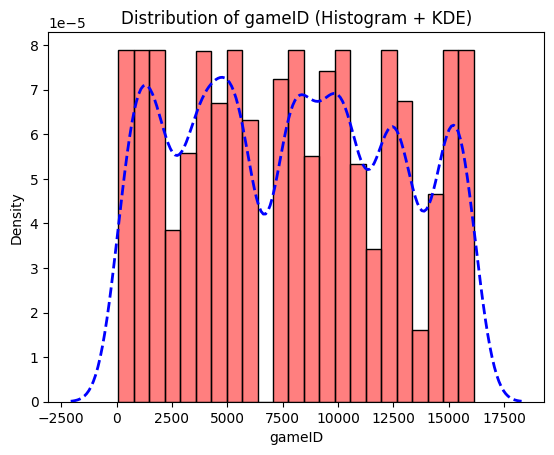

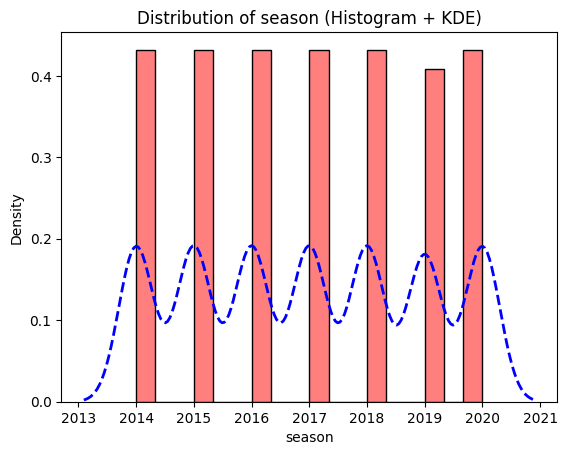

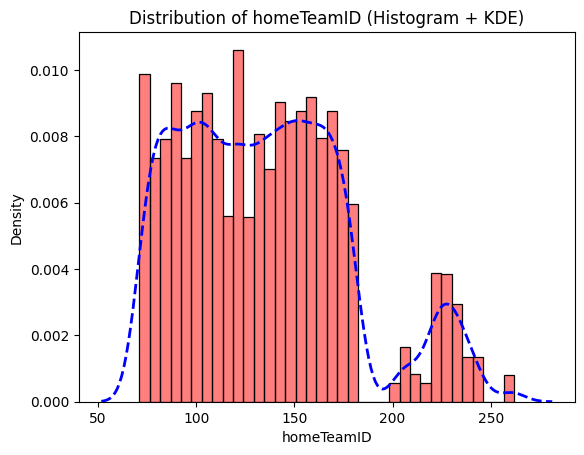

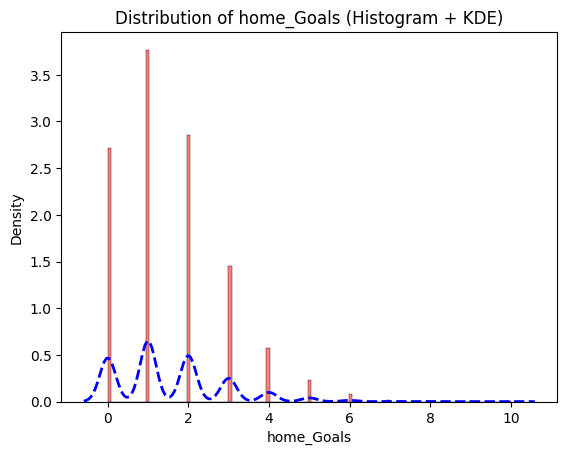

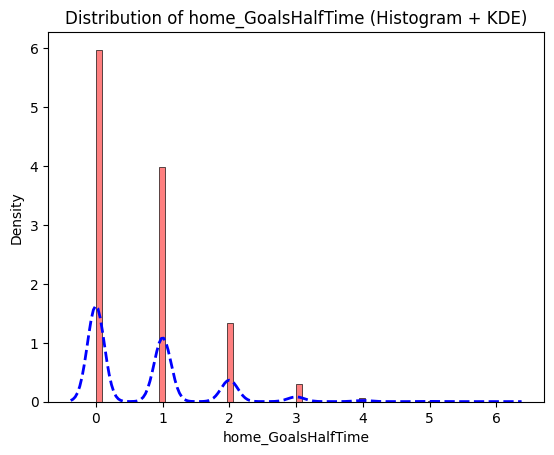

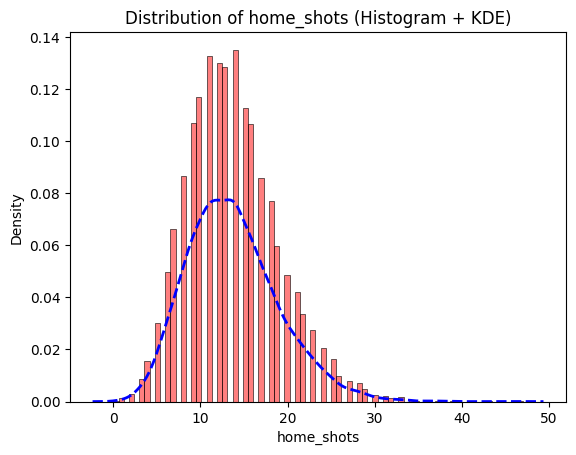

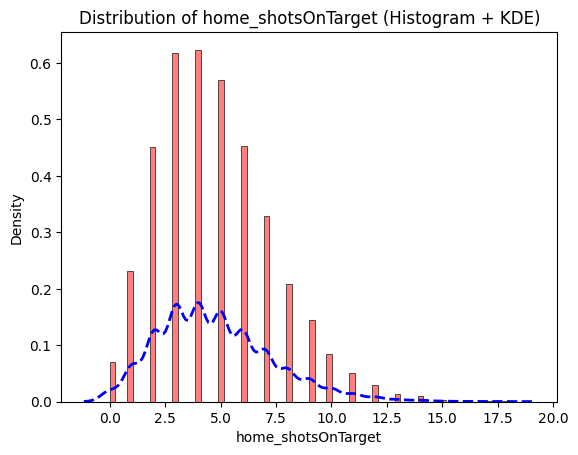

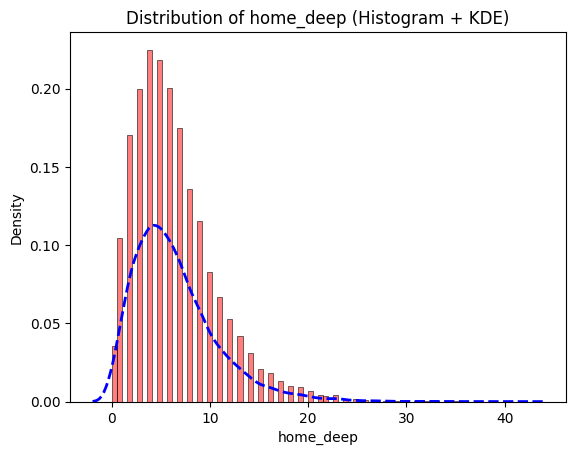

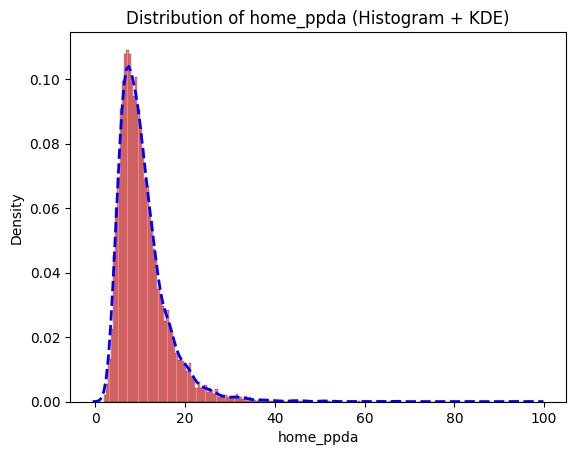

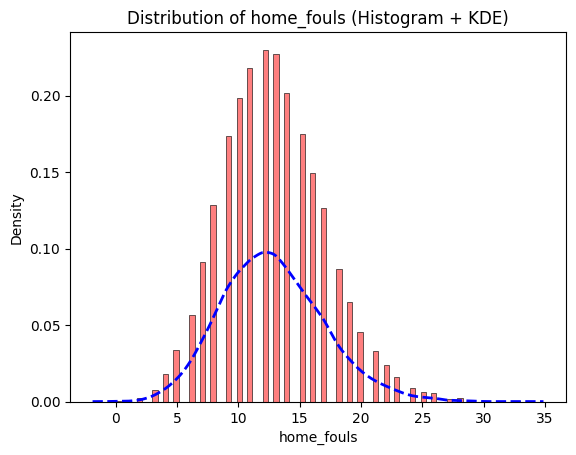

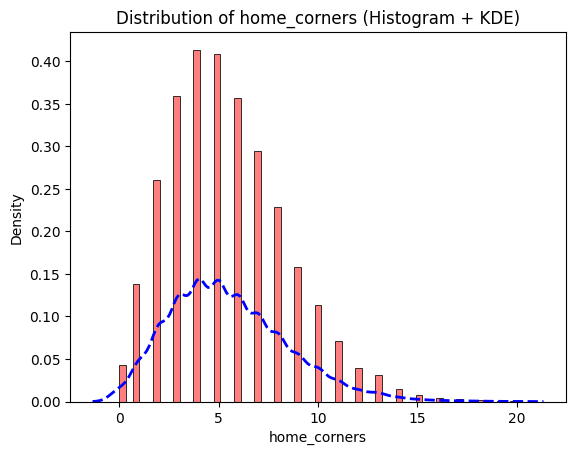

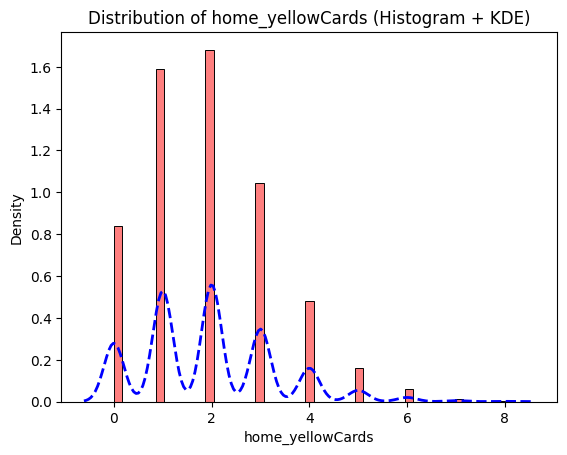

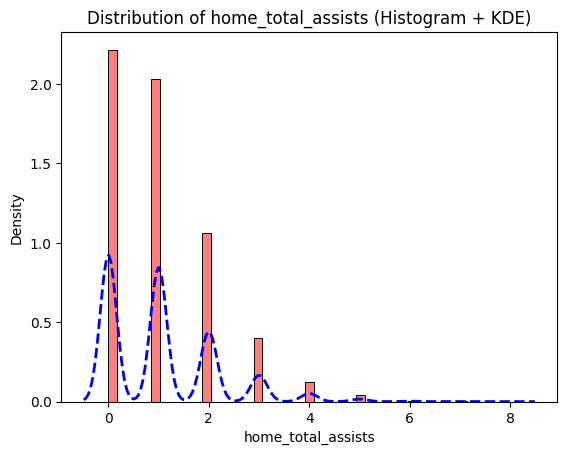

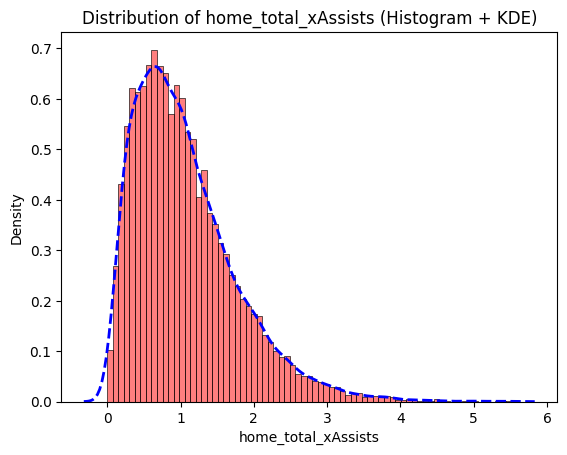

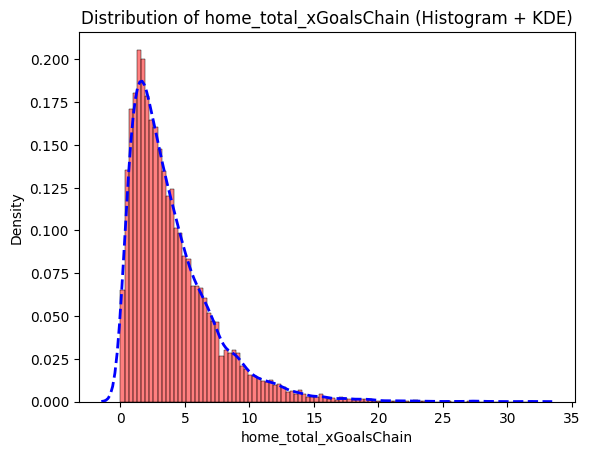

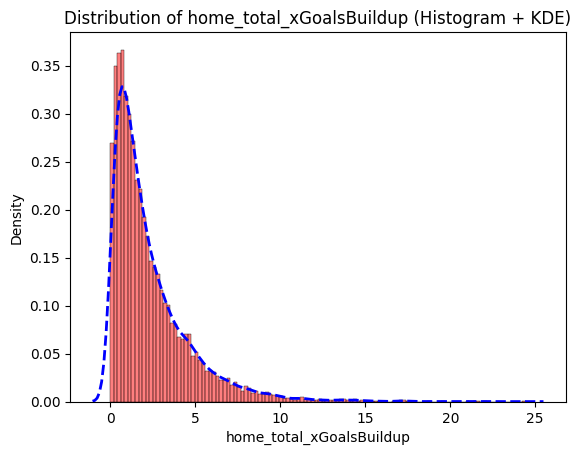

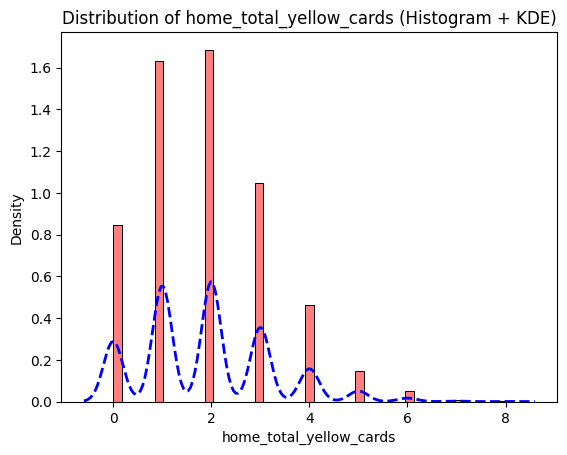

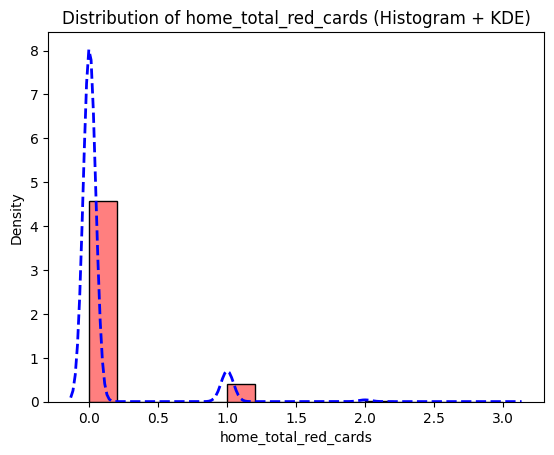

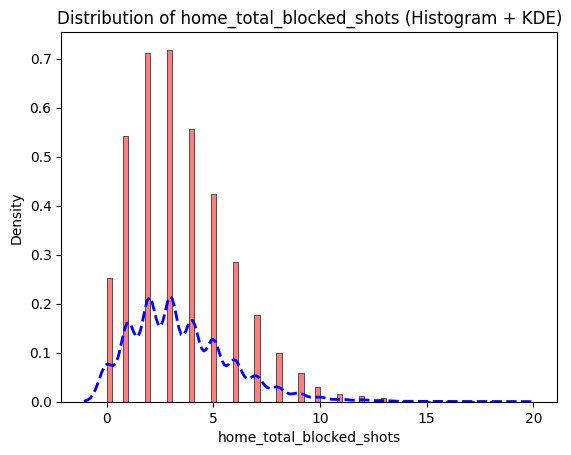

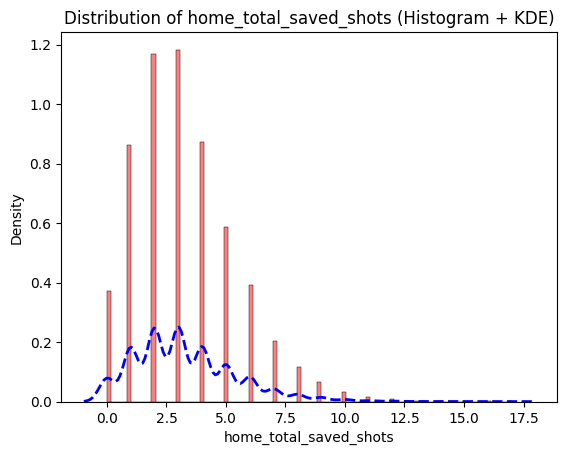

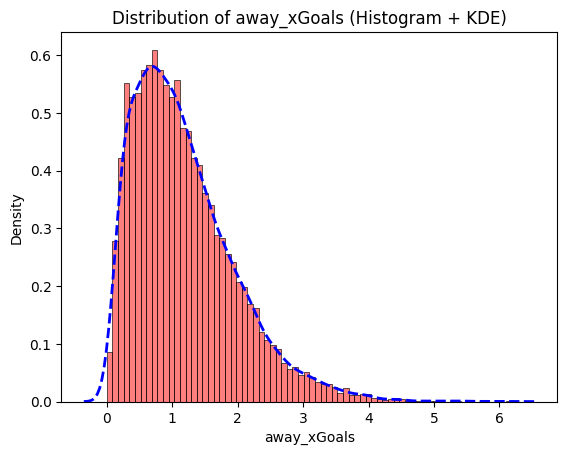

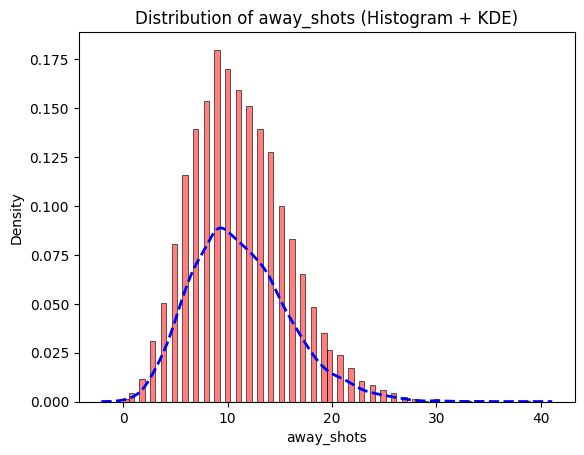

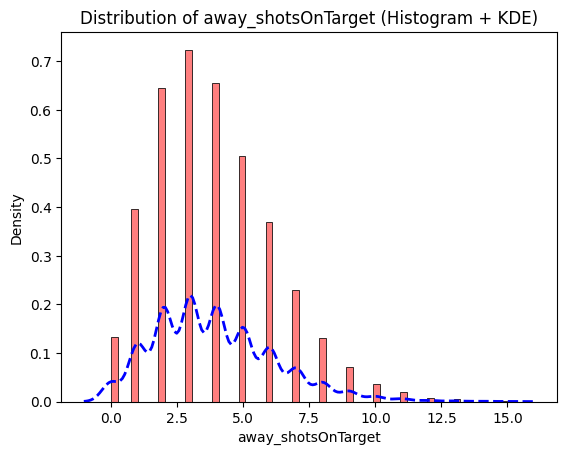

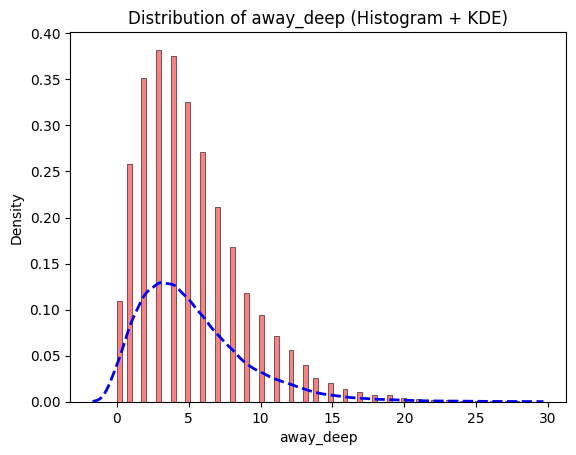

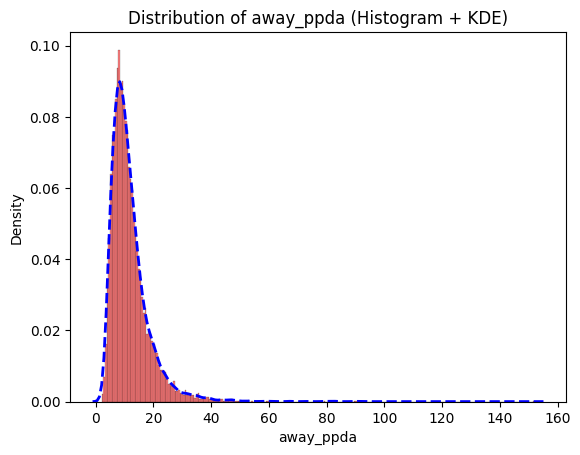

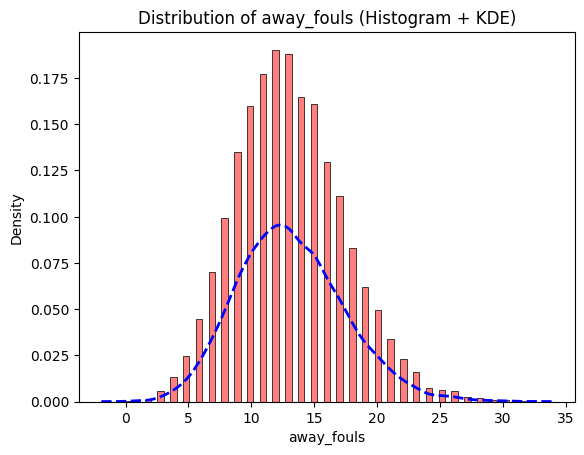

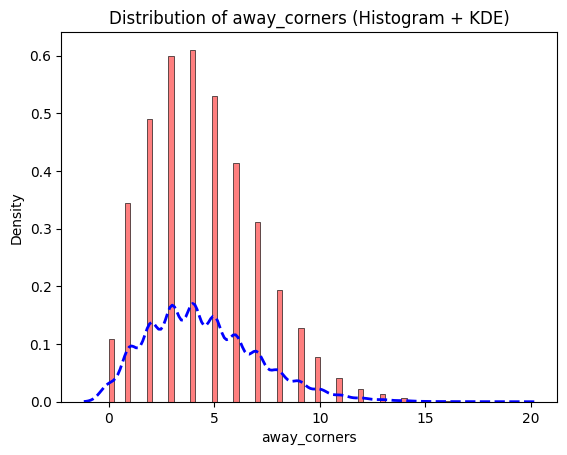

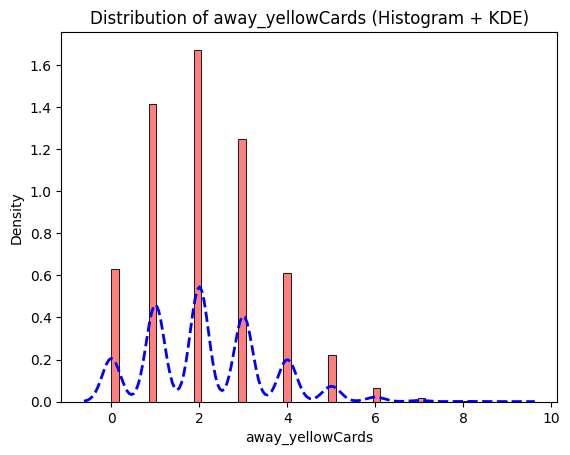

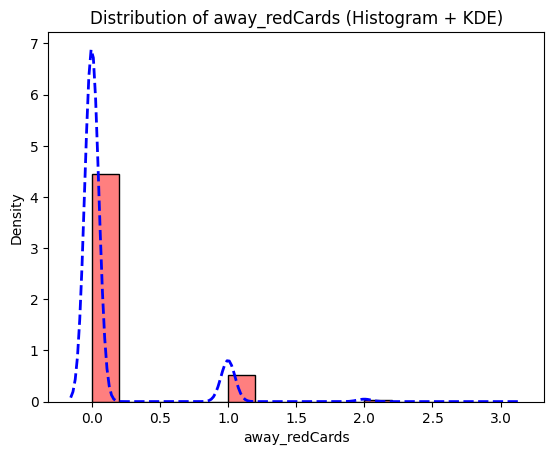

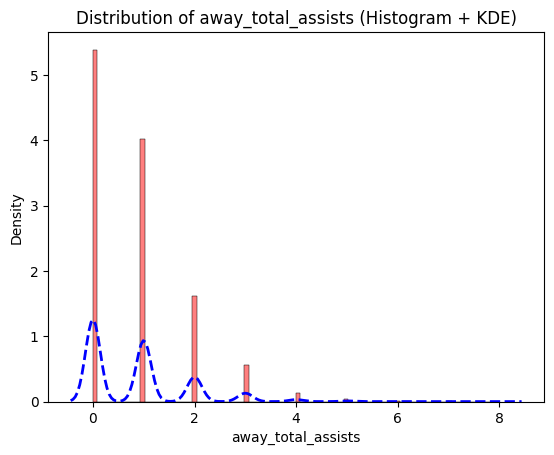

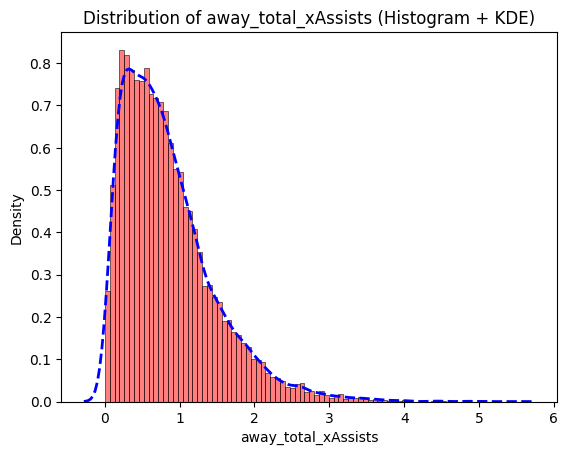

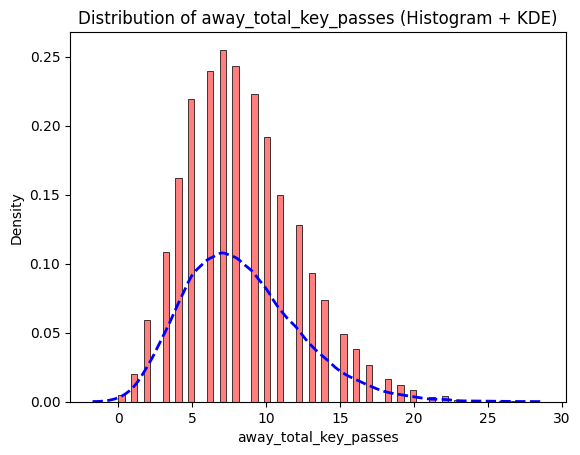

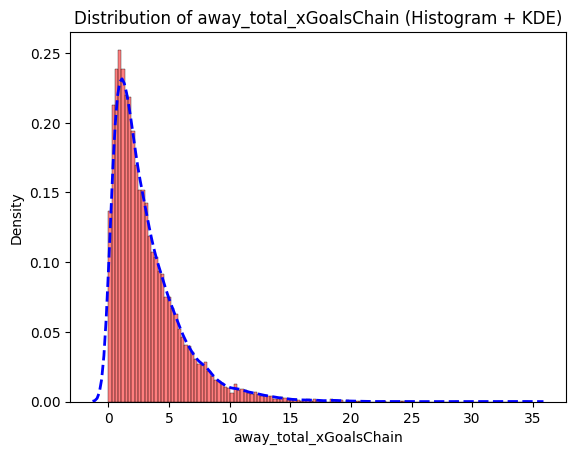

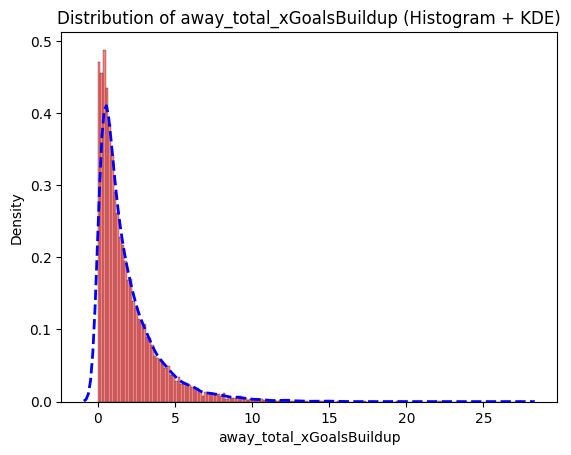

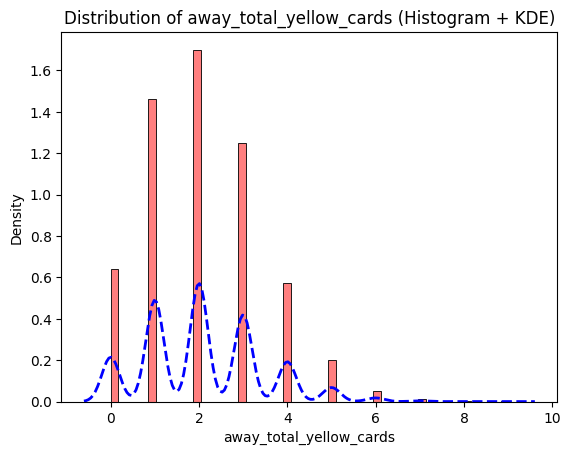

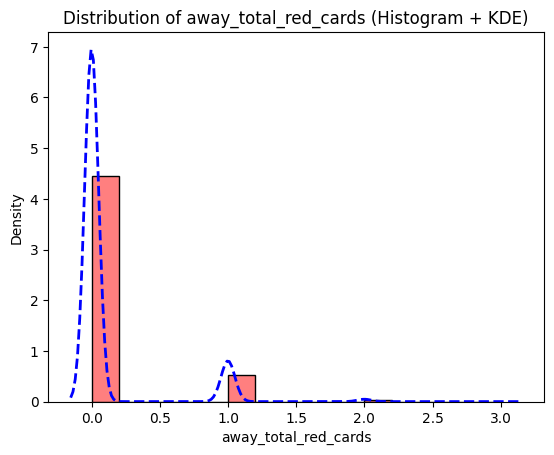

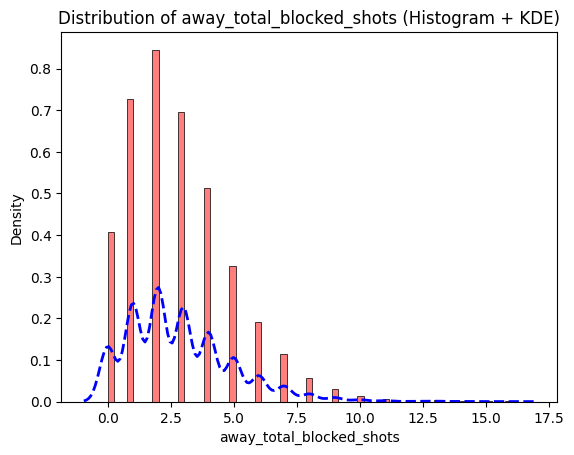

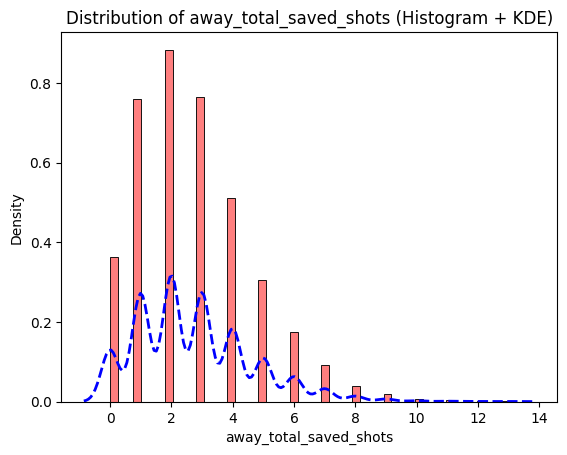

In [8]:
# Ensure inline plotting if you're in a Jupyter environment
%matplotlib inline

# Loop through all numeric columns in your DataFrame and plot distributions
for col in teamstats.select_dtypes(include=[np.number]).columns:
    sns.histplot(
    data=teamstats,
    x=col,
    color='red',
    kde=False,           # We'll add KDE separately
    stat='density',      # <--- Make histogram y-axis a density
    alpha=0.5            # Slight transparency so KDE line is visible
    )
    
    sns.kdeplot(
        data=teamstats,
        x=col,
        color='blue',
        lw=2,
        linestyle='--'
    )

    plt.title(f"Distribution of {col} (Histogram + KDE)")
    plt.xlabel(col)
    plt.show()

# DateTime

In [9]:
# Convert the date column to datetime
teamstats['date'] = pd.to_datetime(teamstats['date'], infer_datetime_format=True)

In [10]:
teamstats['date']

0       2015-08-08 15:45:00
1       2015-08-08 18:00:00
2       2015-08-08 18:00:00
3       2015-08-08 18:00:00
4       2015-08-08 18:00:00
                ...        
12675   2021-05-23 19:00:00
12676   2021-05-23 19:00:00
12677   2021-05-23 19:00:00
12678   2021-05-23 19:00:00
12679   2021-05-23 19:00:00
Name: date, Length: 12680, dtype: datetime64[ns]

# Categorials

In [11]:
df['gameresult']

8859     0
5421     2
5809     2
3293     0
2366     2
        ..
4437     2
687      1
10249    2
12326    2
11119    2
Name: gameresult, Length: 7608, dtype: int64

In [12]:
teamstats['gameresult'] = teamstats['gameresult'].astype('category')

In [13]:
# Extract the numeric codes
df_cat = teamstats[['gameresult']]  # Notice the double brackets


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gameresult  12680 non-null  category
dtypes: category(1)
memory usage: 111.6 KB


<Figure size 2500x1000 with 0 Axes>

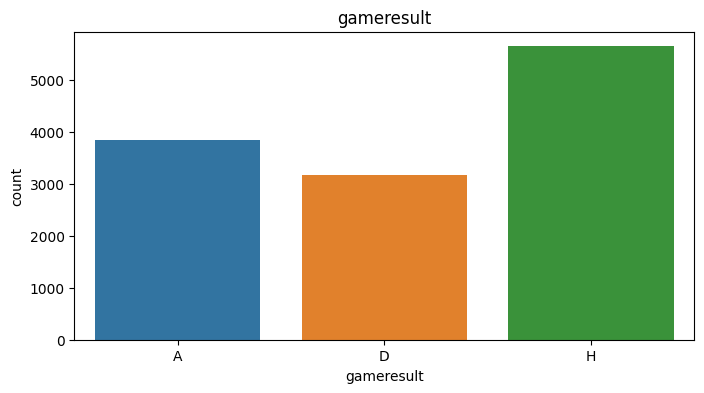

In [15]:
fig=plt.figure(figsize=(25,10))

for col in df_cat.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df_cat)  # Use x=col and data=df_cat
    plt.title(col)
    plt.show()
    

# Continues (numeric)

In [16]:
#get all numeric data
# 1) Select all numeric columns
df_num = teamstats.select_dtypes(include=[np.number])

# 2) Exclude certain columns
excluded_cols = ['gameID', 'leagueID', 'season', 'homeTeamID', 'awayTeamID']
df_num = df_num.drop(columns=excluded_cols, errors='ignore')

df_num.shape

(12680, 40)

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   home_Goals                12680 non-null  int64  
 1   away_Goals                12680 non-null  int64  
 2   home_GoalsHalfTime        12680 non-null  int64  
 3   away_GoalsHalfTime        12680 non-null  int64  
 4   home_xGoals               12680 non-null  float64
 5   home_shots                12680 non-null  int64  
 6   home_shotsOnTarget        12680 non-null  int64  
 7   home_deep                 12680 non-null  int64  
 8   home_ppda                 12680 non-null  float64
 9   home_fouls                12680 non-null  int64  
 10  home_corners              12680 non-null  int64  
 11  home_yellowCards          12679 non-null  float64
 12  home_redCards             12680 non-null  int64  
 13  home_total_assists        12680 non-null  int64  
 14  home_t

array([[<Axes: title={'center': 'home_Goals'}>,
        <Axes: title={'center': 'away_Goals'}>],
       [<Axes: title={'center': 'home_GoalsHalfTime'}>,
        <Axes: title={'center': 'away_GoalsHalfTime'}>],
       [<Axes: title={'center': 'home_xGoals'}>,
        <Axes: title={'center': 'home_shots'}>],
       [<Axes: title={'center': 'home_shotsOnTarget'}>,
        <Axes: title={'center': 'home_deep'}>],
       [<Axes: title={'center': 'home_ppda'}>,
        <Axes: title={'center': 'home_fouls'}>],
       [<Axes: title={'center': 'home_corners'}>,
        <Axes: title={'center': 'home_yellowCards'}>],
       [<Axes: title={'center': 'home_redCards'}>,
        <Axes: title={'center': 'home_total_assists'}>],
       [<Axes: title={'center': 'home_total_xAssists'}>,
        <Axes: title={'center': 'home_total_key_passes'}>],
       [<Axes: title={'center': 'home_total_xGoalsChain'}>,
        <Axes: title={'center': 'home_total_xGoalsBuildup'}>],
       [<Axes: title={'center': 'home_t

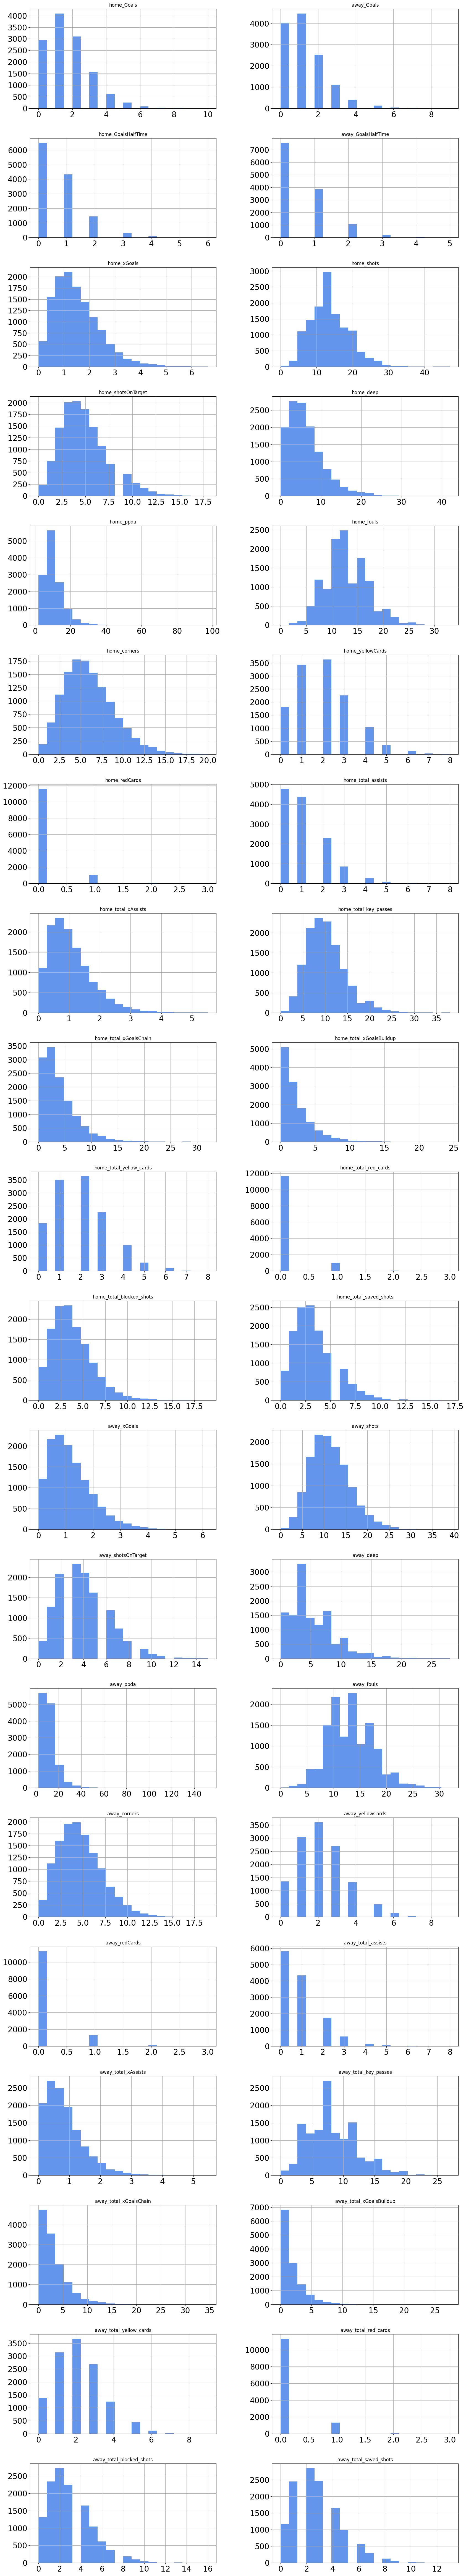

In [18]:
df_num.hist(
    figsize=(20, 120),     # Make each subplot larger
    bins=20, 
    layout=(20, 2),       # 5 rows, 4 columns of subplots
    color="cornflowerblue",
    xlabelsize=20,
    ylabelsize=20
)


# Skewness

In [19]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

# Y - Target Value

<Axes: xlabel='gameresult', ylabel='count'>

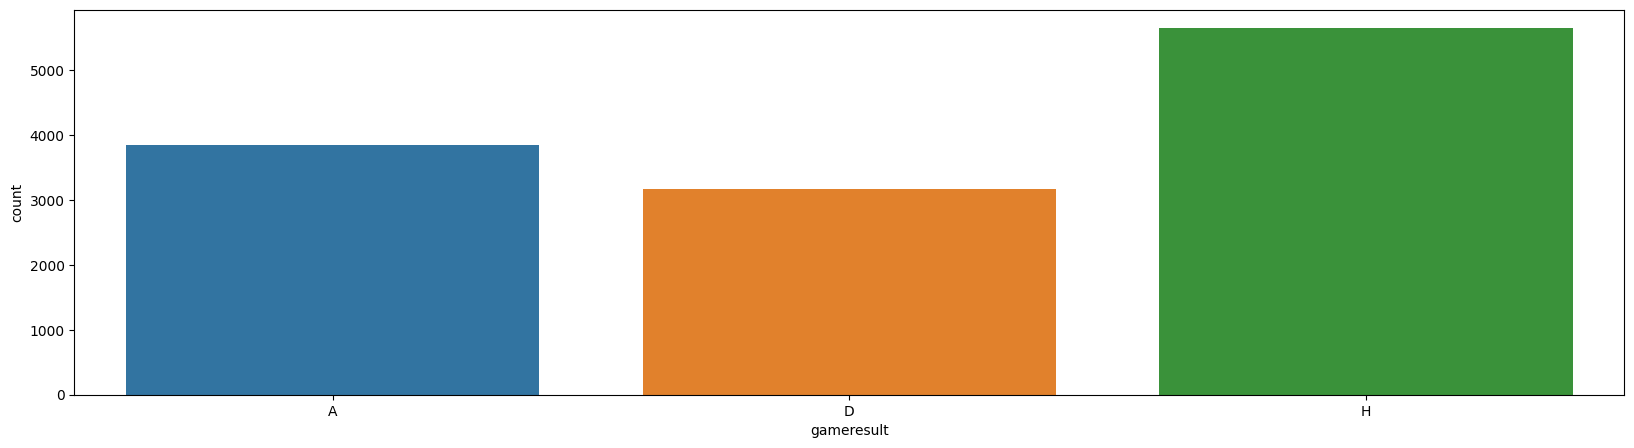

In [20]:
fig, ax=plt.subplots(figsize=(20, 5))
sns.countplot(x=teamstats['gameresult'].dropna(),data=teamstats)

In [21]:
teamstats['gameresult'].value_counts()

H    5654
A    3854
D    3172
Name: gameresult, dtype: int64

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
categorical_cols = teamstats.select_dtypes(include=['object', 'category']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    teamstats[col] = le.fit_transform(teamstats[col])

In [23]:
teamstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   gameID                    12680 non-null  int64         
 1   leagueID                  12680 non-null  int64         
 2   season                    12680 non-null  int64         
 3   date                      12680 non-null  datetime64[ns]
 4   homeTeamID                12680 non-null  int64         
 5   awayTeamID                12680 non-null  int64         
 6   home_Goals                12680 non-null  int64         
 7   away_Goals                12680 non-null  int64         
 8   home_GoalsHalfTime        12680 non-null  int64         
 9   away_GoalsHalfTime        12680 non-null  int64         
 10  home_xGoals               12680 non-null  float64       
 11  home_shots                12680 non-null  int64         
 12  home_shotsOnTarget

# Correlation

In [24]:
corr_spearman = df_num.corr(method='spearman')

In [25]:
corr_spearman

home_Goals  away_Goals  home_GoalsHalfTime  \
home_Goals                  1.000000   -0.075874            0.658365   
away_Goals                 -0.075874    1.000000           -0.034998   
home_GoalsHalfTime          0.658365   -0.034998            1.000000   
away_GoalsHalfTime         -0.031795    0.665542           -0.034418   
home_xGoals                 0.608347   -0.124532            0.384339   
home_shots                  0.264244   -0.062635            0.094571   
home_shotsOnTarget          0.566983   -0.093423            0.347701   
home_deep                   0.244392   -0.064400            0.113474   
home_ppda                  -0.016869    0.081781            0.078865   
home_fouls                 -0.076529    0.007621           -0.028519   
home_corners                0.012084   -0.042092           -0.061367   
home_yellowCards           -0.110358    0.094092           -0.078678   
home_redCards              -0.078921    0.119724           -0.034297   
home_total_assists          0.821408   -0.076967            0.553991   
home_total_xAssists         0.524452   -0.144809            0.342967   
home_total_key_passes       0.265327   -0.082397            0.104662   
home_total_xGoalsChain      0.502133   -0.148832            0.335959   
home_total_xGoalsBuildup    0.436624   -0.130675            0.291998   
home_total_yellow_cards    -0.106708    0.084468           -0.078712   
home_total_red_cards       -0.079071    0.119791           -0.034715   
home_total_blocked_shots   -0.005759    0.002203           -0.065756   
home_total_saved_shots      0.108625   -0.066179            0.037200   
away_xGoals                -0.133065    0.606813           -0.060373   
away_shots                 -0.075582    0.301792            0.024601   
away_shotsOnTarget         -0.095580    0.563273           -0.029802   
away_deep                  -0.098196    0.250748           -0.012637   
away_ppda                   0.124819   -0.053056            0.015049   
away_fouls                 -0.038290   -0.020160           -0.031166   
away_corners               -0.022524    0.036902            0.055099   
away_yellowCards           -0.002762   -0.015331            0.000536   
away_redCards               0.078895   -0.065490            0.036997   
away_total_assists         -0.083797    0.826960           -0.052697   
away_total_xAssists        -0.148038    0.519682           -0.081793   
away_total_key_passes      -0.090315    0.288618            0.005640   
away_total_xGoalsChain     -0.153945    0.497257           -0.091736   
away_total_xGoalsBuildup   -0.134761    0.428352           -0.075297   
away_total_yellow_cards    -0.004914   -0.015292           -0.000887   
away_total_red_cards        0.080064   -0.065757            0.037384   
away_total_blocked_shots   -0.022438    0.038495            0.042827   
away_total_saved_shots     -0.069618    0.098243           -0.014708   

                          away_GoalsHalfTime  home_xGoals  home_shots  \
home_Goals                         -0.031795     0.608347    0.264244   
away_Goals                          0.665542    -0.124532   -0.062635   
home_GoalsHalfTime                 -0.034418     0.384339    0.094571   
away_GoalsHalfTime                  1.000000    -0.067653    0.020847   
home_xGoals                        -0.067653     1.000000    0.616286   
home_shots                          0.020847     0.616286    1.000000   
home_shotsOnTarget                 -0.028309     0.660090    0.642636   
home_deep                          -0.000579     0.475620    0.553946   
home_ppda                          -0.009549    -0.176584   -0.315042   
home_fouls                         -0.004332    -0.094158   -0.131675   
home_corners                        0.034687     0.254129    0.502022   
home_yellowCards                    0.074368    -0.100449   -0.108091   
home_redCards                       0.076753    -0.098981   -0.103266   
home_total_assists                 -0.040397     0.

In [1]:
# plt.figure(figsize=(70, 50))
# sns.heatmap(corr_spearman, cmap='coolwarm', annot=True)
# plt.title("Spearman Correlation Heatmap")
# plt.show()

plt.figure(figsize=(70, 50))
sns.heatmap(corr_spearman, cmap='coolwarm', annot=True)
plt.title("Spearman Correlation Heatmap")

# Save the figure before showing it
plt.savefig("../plots/spearman_heatmap.png", dpi=300, bbox_inches='tight')  # high quality with tight layout

plt.show()

NameError: name 'plt' is not defined

In [27]:
skew_threshold = 1.0
skewed_cols = [col for col in df_num.columns if abs(df_num[col].skew()) > skew_threshold]
print("Skewed columns:", skewed_cols)

Skewed columns: ['away_Goals', 'home_GoalsHalfTime', 'away_GoalsHalfTime', 'home_xGoals', 'home_deep', 'home_ppda', 'home_redCards', 'home_total_assists', 'home_total_xAssists', 'home_total_xGoalsChain', 'home_total_xGoalsBuildup', 'home_total_red_cards', 'away_xGoals', 'away_deep', 'away_ppda', 'away_redCards', 'away_total_assists', 'away_total_xAssists', 'away_total_xGoalsChain', 'away_total_xGoalsBuildup', 'away_total_red_cards', 'away_total_blocked_shots']


In [28]:
df_num_log = df_num.copy()
for col in skewed_cols:
    # Only transform if the column has all non-negative values
    if (df_num_log[col] >= 0).all():
        df_num_log[col] = np.log1p(df_num_log[col])  # log(x+1)
    else:
        # If there are negative or zero values, handle them separately
        # e.g. skip, or shift them by +some_constant
        pass


In [29]:
corr_pearson = df_num_log.corr(method='pearson')


In [30]:
corr_pearson

home_Goals  away_Goals  home_GoalsHalfTime  \
home_Goals                  1.000000   -0.085832            0.666353   
away_Goals                 -0.085832    1.000000           -0.037617   
home_GoalsHalfTime          0.666353   -0.037617            1.000000   
away_GoalsHalfTime         -0.040373    0.674313           -0.039389   
home_xGoals                 0.621333   -0.128950            0.397623   
home_shots                  0.280560   -0.066014            0.096988   
home_shotsOnTarget          0.593591   -0.098072            0.359720   
home_deep                   0.269155   -0.072615            0.123532   
home_ppda                  -0.028284    0.093941            0.068830   
home_fouls                 -0.095856    0.003898           -0.031032   
home_corners                0.015645   -0.044506           -0.066489   
home_yellowCards           -0.127530    0.089131           -0.079365   
home_redCards              -0.080298    0.122183           -0.033837   
home_total_assists          0.810594   -0.080402            0.564533   
home_total_xAssists         0.551708   -0.149913            0.358942   
home_total_key_passes       0.283217   -0.087640            0.108571   
home_total_xGoalsChain      0.530023   -0.153798            0.351978   
home_total_xGoalsBuildup    0.476669   -0.138484            0.312805   
home_total_yellow_cards    -0.124285    0.078697           -0.080040   
home_total_red_cards       -0.080946    0.122077           -0.034751   
home_total_blocked_shots   -0.003928   -0.000755           -0.070681   
home_total_saved_shots      0.125336   -0.068281            0.042468   
away_xGoals                -0.150085    0.615056           -0.069724   
away_shots                 -0.095903    0.304452            0.017101   
away_shotsOnTarget         -0.107634    0.569233           -0.039656   
away_deep                  -0.116410    0.251569           -0.017466   
away_ppda                   0.178360   -0.063812            0.039181   
away_fouls                 -0.064756   -0.024229           -0.037091   
away_corners               -0.038461    0.033442            0.054657   
away_yellowCards           -0.018811   -0.014269           -0.004444   
away_redCards               0.073573   -0.066370            0.037501   
away_total_assists         -0.090021    0.831215           -0.055510   
away_total_xAssists        -0.161196    0.535790           -0.091852   
away_total_key_passes      -0.110188    0.294093           -0.002361   
away_total_xGoalsChain     -0.163917    0.510330           -0.097431   
away_total_xGoalsBuildup   -0.148088    0.447576           -0.084576   
away_total_yellow_cards    -0.020316   -0.014757           -0.005680   
away_total_red_cards        0.074213   -0.066569            0.037440   
away_total_blocked_shots   -0.039011    0.040876            0.041164   
away_total_saved_shots     -0.074929    0.106804           -0.019954   

                          away_GoalsHalfTime  home_xGoals  home_shots  \
home_Goals                         -0.040373     0.621333    0.280560   
away_Goals                          0.674313    -0.128950   -0.066014   
home_GoalsHalfTime                 -0.039389     0.397623    0.096988   
away_GoalsHalfTime                  1.000000    -0.071076    0.016827   
home_xGoals                        -0.071076     1.000000    0.629700   
home_shots                          0.016827     0.629700    1.000000   
home_shotsOnTarget                 -0.034650     0.676205    0.664302   
home_deep                          -0.007904     0.490572    0.555342   
home_ppda                           0.006567    -0.190396   -0.323308   
home_fouls                         -0.007296    -0.100012   -0.143358   
home_corners                        0.031465     0.266592    0.521157   
home_yellowCards                    0.069506    -0.100178   -0.111155   
home_redCards                       0.078458    -0.098994   -0.100345   
home_total_assists                 -0.043502     0.

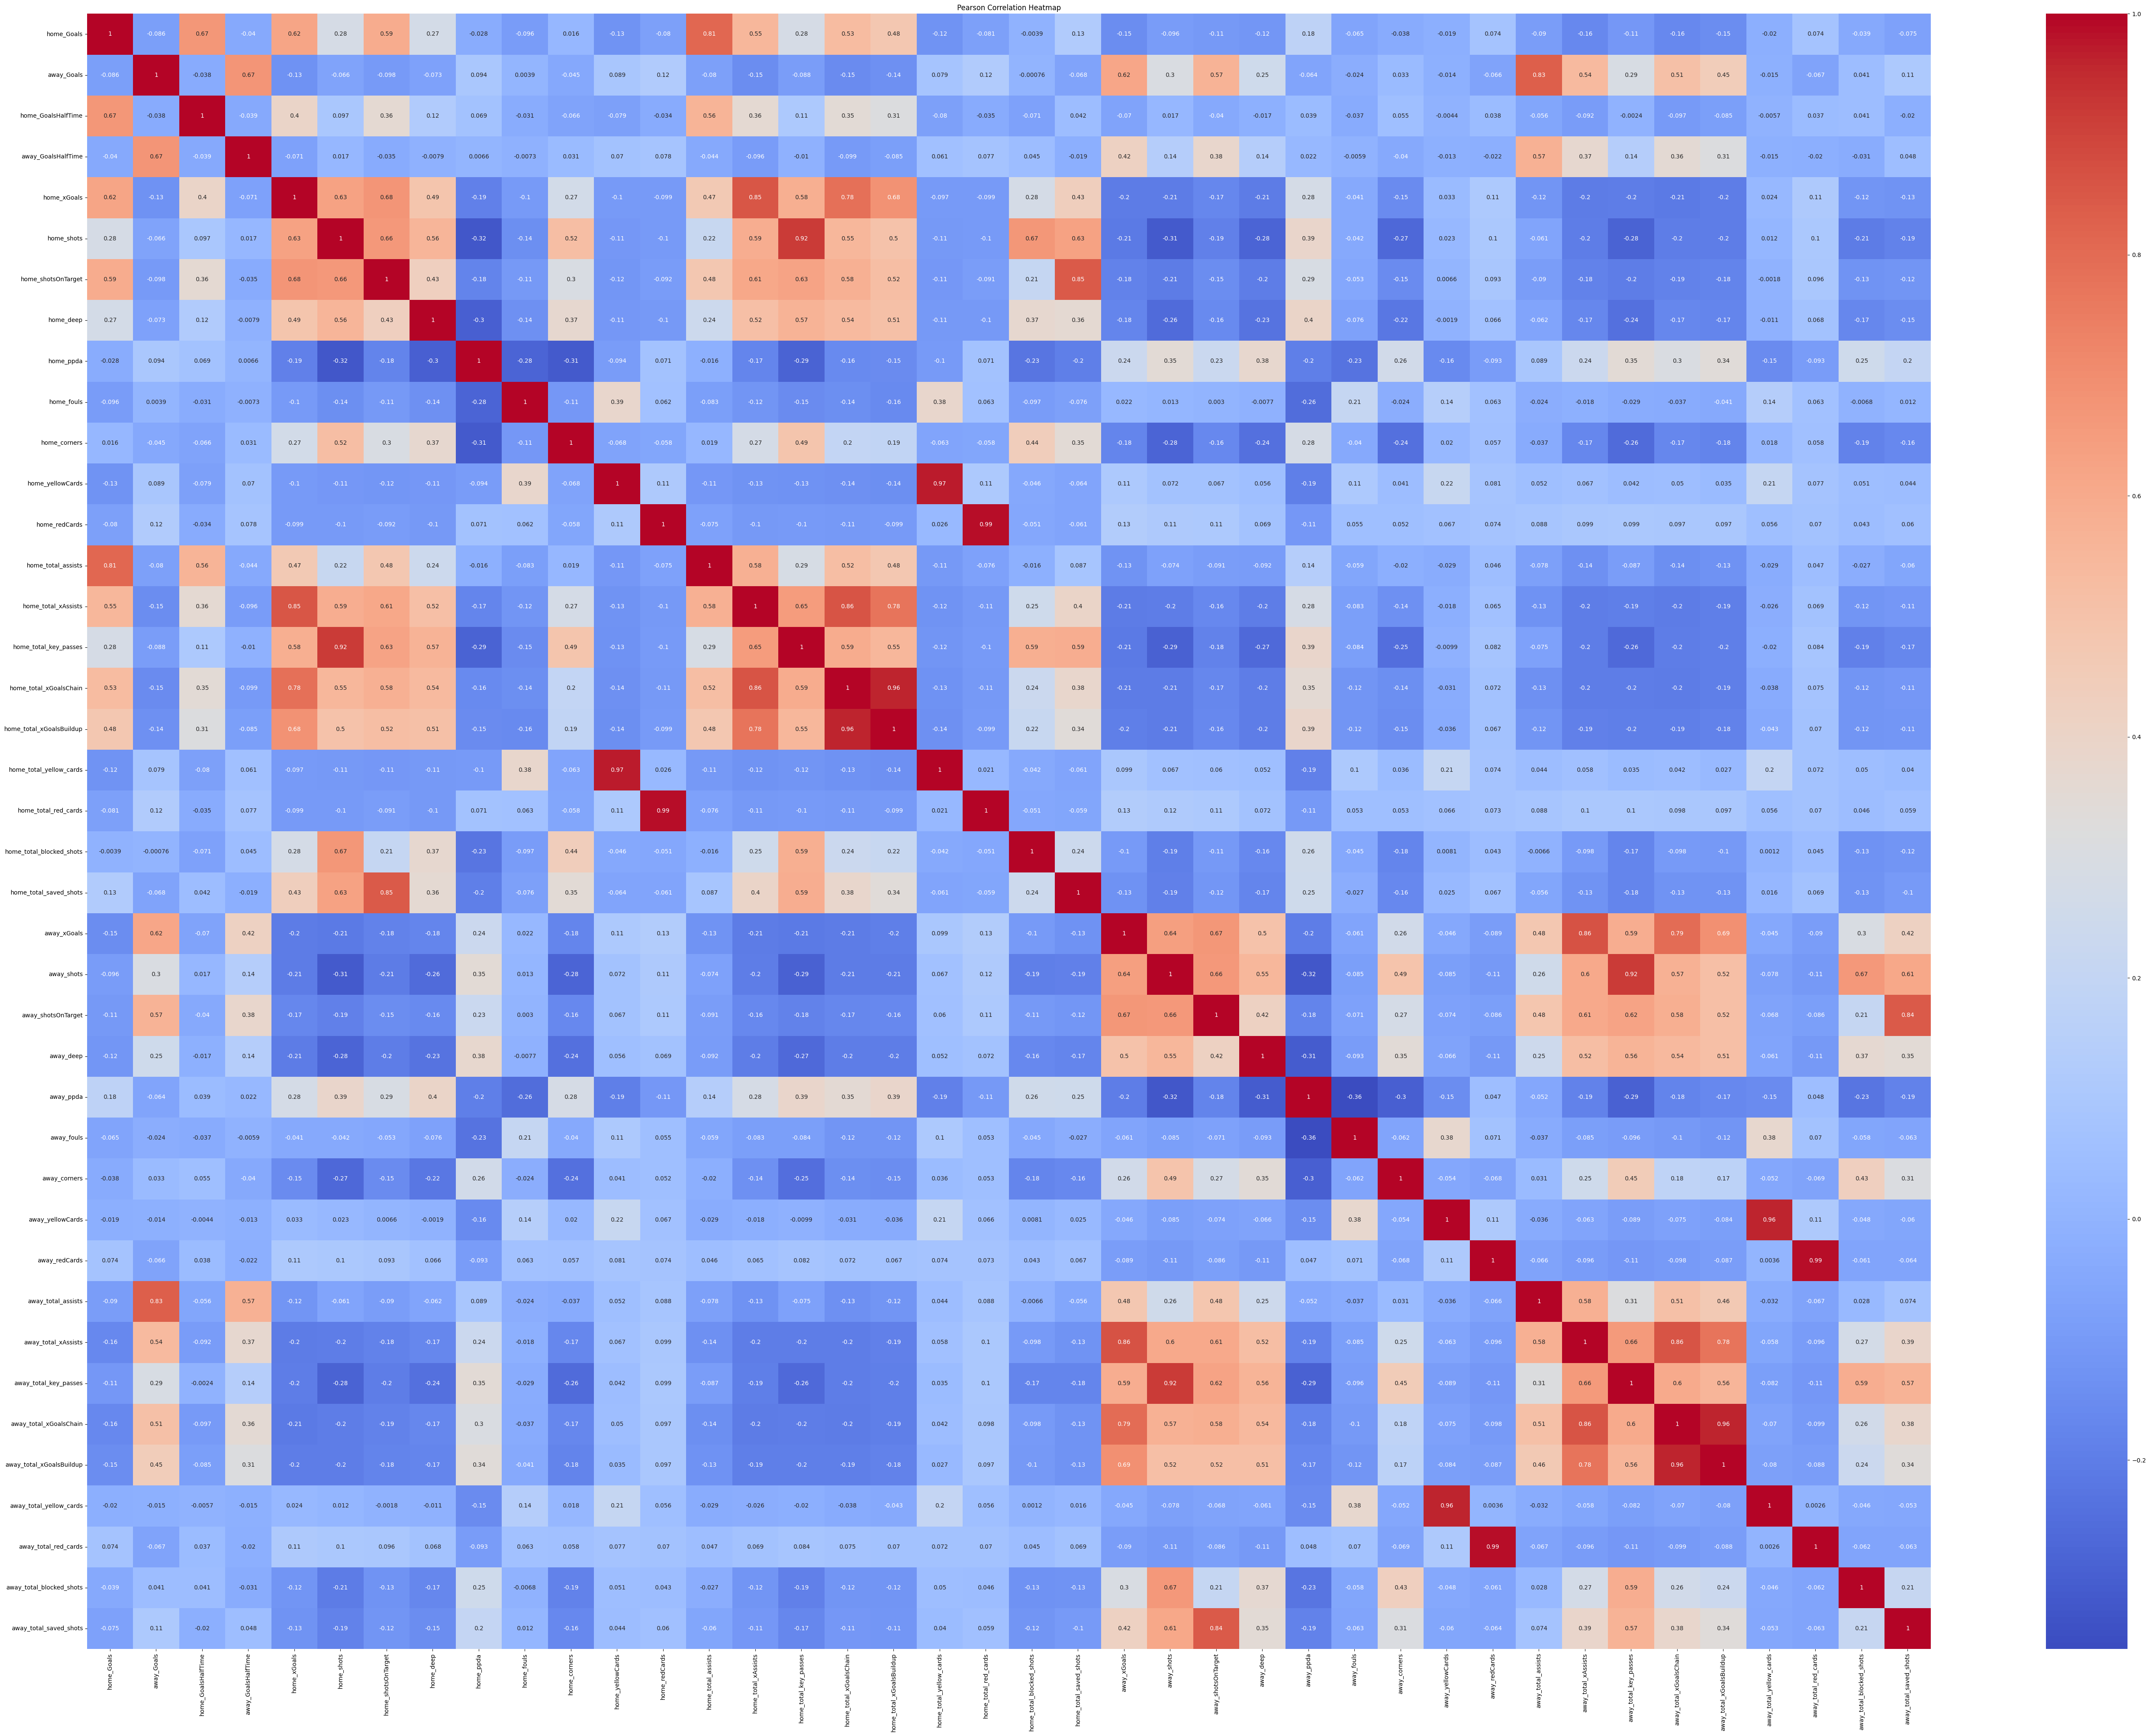

In [31]:
plt.figure(figsize=(70, 50))
sns.heatmap(corr_pearson, cmap='coolwarm', annot=True)
plt.title("Pearson Correlation Heatmap")
plt.show()

## 1. Why Two Correlation Matrices?
Spearman’s Correlation:

Measures monotonic relationships (if one variable goes up, does the other consistently go up or down?).
Rank-based, so it’s more robust to outliers and skew.
A high Spearman correlation (
𝜌
ρ close to +1 or –1) means the two variables move together in rank, even if the relationship isn’t strictly linear.
Pearson’s Correlation:

Measures linear relationships.
More sensitive to outliers and skewed data.
A high Pearson correlation (
𝑟
r close to +1 or –1) means the two variables move together in a roughly linear fashion.
By comparing them, you see where variables are consistently related (both Spearman and Pearson are large in magnitude) versus where the relationship might be non-linear (Spearman is strong, but Pearson is weaker) or influenced by outliers/skew.

## 2. Identify Strong Relationships
Look for correlation coefficients with large absolute values (e.g., above ~0.5 or 0.6). For instance, in your Spearman table, you might see:

home_xGoals is strongly correlated (Spearman 
≈
0.84
≈0.84) with home_total_xAssists, suggesting that as the home team’s expected goals increase, so do their total xAssists in a fairly monotonic way.
Similarly, in Pearson’s matrix, home_xGoals and home_total_xAssists also show a strong linear correlation (~0.85).
When a relationship is consistently strong in both Spearman and Pearson, that often means you have a robust, near-linear association.

## 3. Spot Differences Due to Skew
Some variables might show a higher correlation under Spearman than Pearson (or vice versa). This often indicates:

Skew or Outliers are influencing Pearson, making the linear correlation weaker or stronger than the monotonic trend.
For instance, you might see that home_ppda correlates differently with certain offensive stats in Spearman vs. Pearson. If the difference is large, it can mean a few extreme values are affecting the linear measure.

## 4. Multicollinearity Concerns
If you see multiple columns with correlations near ±0.8 or ±0.9, that suggests multicollinearity. For example, home_shots and home_total_key_passes might be strongly correlated. In modeling:

Dropping one of the highly correlated features or combining them (e.g., via PCA) can help reduce redundancy.
Check both Spearman and Pearson for strong clusters of correlated features.

## 5. Modeling Implications
Feature Selection:
If two variables are almost duplicates (like home_total_xGoalsChain vs. home_total_xGoalsBuildup with correlation ~0.95), you might choose only one to avoid redundancy.
Transformations:
If you see big differences between Spearman and Pearson, consider log transforms or other transformations on heavily skewed variables (like home_ppda or home_total_red_cards) before using them in a linear model.
Interpretation:
Spearman is telling you which pairs move together in rank order—good for capturing monotonic trends.
Pearson is telling you which pairs have a more direct linear relationship—useful for linear regression assumptions.

## 6. Next Steps
Highlight Strong Correlations:
Identify pairs with |corr| ≥ 0.7 or 0.8. Investigate if they’re truly redundant or if each has unique predictive value.
Check for Potential Data Issues:
Extremely high correlation can signal duplicates or derived columns (like home_shots vs. home_total_blocked_shots might be partly overlapping).
Consider Log Transform:
For columns with high skew (e.g., red cards, which are often 0 or 1 with occasional higher values), a log transform or another approach (like a Box-Cox transform) might help linear models. Re-check Pearson correlation after transformation if linear relationships are of interest.
Use Spearman for Rank-Based Insights:
If your target variable (gameresult) is ordinal or you suspect non-linear but monotonic relationships, Spearman can be more informative.

## Summary
You have two correlation matrices—Spearman and Pearson—because your data is skewed, and you want to compare monotonic vs. linear relationships.
High correlation in both indicates a strong linear relationship that’s robust to skew.
Differences between Spearman and Pearson can highlight skew/outliers or non-linear patterns.
Use these insights to choose features, consider transformations, and interpret whether variables have linear or simply monotonic relationships.
Ultimately, both matrices are valuable: Spearman for robust, monotonic insight and Pearson for linear modeling considerations.

# T-Test

In [32]:
import scipy.stats as stats
import seaborn as sns

In [33]:
from scipy.stats import ttest_ind

# Create groups based on gameresult:
# Group 1: Home Wins (assuming gameresult == 2 indicates a home win)
home_wins = teamstats[teamstats['gameresult'] == 2]['home_xGoals']

# Group 2: Not Home Wins (draws and away wins)
non_home_wins = teamstats[teamstats['gameresult'] != 2]['home_xGoals']

# Perform the t-test (using Welch's t-test by setting equal_var=False)
t_stat, p_val = ttest_ind(home_wins, non_home_wins, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


T-statistic: 51.8705, p-value: 0.0000


You can confidently reject the null hypothesis that there is no difference in home_xGoals between home wins and non-home wins. 
In practical terms, this means that the home team’s expected goals (home_xGoals) are significantly higher (or lower, depending on the direction of the difference) when they win compared to when they don’t win, and this difference is not due to random chance.
If you’re using this variable for predictive modeling or further analysis, it appears to be a very strong indicator of match outcome in your dataset. 

In [34]:
from scipy.stats import f_oneway

# Assuming gameresult codes: 2 for home win, 1 for draw, 0 for away win (or adjust as needed)
group_home_win = teamstats[teamstats['gameresult'] == 2]['home_xGoals']
group_draw = teamstats[teamstats['gameresult'] == 1]['home_xGoals']
group_away_win = teamstats[teamstats['gameresult'] == 0]['home_xGoals']

f_stat, p_val = f_oneway(group_home_win, group_draw, group_away_win)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 1547.4971, p-value: 0.0000


This indicates that the means of the home_xGoals variable differ significantly across all three groups (home win, draw, away win). In other words, at least one group’s mean is different from the others. This justifies that home_xGoals is an important metric in differentiating match outcomes.

In [35]:
from scipy.stats import ttest_rel

# Create a new series with the difference between home and away expected goals
diff_xGoals = teamstats['home_xGoals'] - teamstats['away_xGoals']
# If you have a hypothesis regarding this difference, you could perform a paired t-test.
# For example, testing whether the mean difference is significantly different from 0:
t_stat, p_val = ttest_rel(teamstats['home_xGoals'], teamstats['away_xGoals'])
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")


Paired t-test: t-statistic = 28.1871, p-value = 0.0000


The paired t-test shows a highly significant difference between home_xGoals and away_xGoals for each game. This suggests that the disparity between home and away expected goals is very informative about the match outcome.

In [36]:
# List of features to test
features = [
    'home_shots', 'away_shots',
    'home_deep', 'away_deep',
    'home_ppda', 'away_ppda',
    'home_fouls', 'away_fouls',
    'home_corners', 'away_corners',
    'home_yellowCards', 'away_yellowCards',
    'home_redCards', 'away_redCards',
]

# Loop over each feature and perform one-way ANOVA based on gameresult groups
for feat in features:
    # Create a list of series, one for each group defined by gameresult
    groups = [group[feat].dropna() for _, group in teamstats.groupby('gameresult')]
    
    # Run ANOVA: f_oneway takes each group as a separate argument
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA for {feat}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")


ANOVA for home_shots: F-statistic = 220.7895, p-value = 0.0000
ANOVA for away_shots: F-statistic = 331.2351, p-value = 0.0000
ANOVA for home_deep: F-statistic = 224.1493, p-value = 0.0000
ANOVA for away_deep: F-statistic = 333.4027, p-value = 0.0000
ANOVA for home_ppda: F-statistic = 55.9803, p-value = 0.0000
ANOVA for away_ppda: F-statistic = 81.4031, p-value = 0.0000
ANOVA for home_fouls: F-statistic = 22.5709, p-value = 0.0000
ANOVA for away_fouls: F-statistic = 29.2506, p-value = 0.0000
ANOVA for home_corners: F-statistic = 11.3146, p-value = 0.0000
ANOVA for away_corners: F-statistic = 4.2018, p-value = 0.0150
ANOVA for home_yellowCards: F-statistic = 84.8338, p-value = 0.0000
ANOVA for away_yellowCards: F-statistic = 16.2915, p-value = 0.0000
ANOVA for home_redCards: F-statistic = 108.9195, p-value = 0.0000
ANOVA for away_redCards: F-statistic = 74.0203, p-value = 0.0000


These ANOVA results tell you that for every feature you tested, the mean value differs significantly across the match outcome groups (gameresult), meaning that the variation between groups is far greater than the variation within each group. In other words:

High F-statistics & Near-Zero P-values:
Almost every feature (e.g., home_shots, away_shots, homeGoalsHalfTime, etc.) shows a very high F-statistic and a p-value effectively equal to 0. This indicates that the probability of observing such differences by chance is extremely low. For instance, homeGoalsHalfTime and awayGoalsHalfTime have F-statistics over 1400, suggesting that these variables differ drastically across the different match outcomes.

Away_corners Exception:
Although the F-statistic for away_corners is lower (4.2018), its p-value is still below a typical significance threshold (p = 0.0150), meaning that even this feature shows statistically significant differences between groups.

In [37]:
df=teamstats.copy()

In [38]:
from matplotlib.backends.backend_pdf import PdfPages
import textwrap
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene


# Loop over each feature
pdf = PdfPages('../analysis_results_table.pdf')


for feat in features:
    # 1) Perform Tukey’s HSD
    mask = df[feat].notna()
    tukey_result = pairwise_tukeyhsd(
        endog=df.loc[mask, feat],
        groups=df.loc[mask, 'gameresult'],
        alpha=0.05
    )

    # 2) Boxplot Page
    fig_box, ax_box = plt.subplots(figsize=(8, 6))
    sns.boxplot(x='gameresult', y=feat, data=df, ax=ax_box)
    ax_box.set_title(f"Boxplot of {feat} by gameresult")
    ax_box.set_xlabel("gameresult")
    ax_box.set_ylabel(feat)
    plt.tight_layout()
    pdf.savefig(fig_box)
    plt.close(fig_box)

    # 3) Levene's Test
    groups = [group[feat].dropna() for _, group in df.groupby('gameresult')]
    stat, p_val = levene(*groups)
    levene_text = f"Levene's test for {feat}: Statistic={stat:.4f}, p-value={p_val:.4f}"

    # 4) Tukey Table Page (without adding Levene to the table)
    table_data = tukey_result.summary().data  # includes title, headers, etc.

    # Create a figure for the Tukey table
    # Increase bottom margin so there's space for Levene text
    fig_table, ax_table = plt.subplots(figsize=(12, 6))

    ax_table.axis('off')
    ax_table.set_title(f"Tukey's HSD for {feat}", pad=20)
    # Place the Tukey table near the top
    table = ax_table.table(
    cellText=table_data,
    loc='upper center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.auto_set_column_width(col=list(range(len(table_data[0]))))
    ax_table.set_title(f"Tukey's HSD for {feat}", pad=20)

    # Add Levene's test text below the table
    # Adjust 'y' coordinate or 'bottom' margin if text is clipped
    ax_table.text(
        0.0, 0.03,  # x=0.0 => left margin, y=0.03 => near the bottom
        levene_text,
        transform=ax_table.transAxes,
        fontsize=10
    )

    pdf.savefig(fig_table, bbox_inches='tight')
    plt.close(fig_table)

pdf.close()

In [39]:
df['gameresult'].value_counts()

2    5654
0    3854
1    3172
Name: gameresult, dtype: int64

0 for away win, 1 for draw, 2 for home win

In [63]:
from IPython.display import IFrame

# Replace "analysis_results_table.pdf" with the actual path to your PDF
IFrame("../analysis_results_table.pdf", width=1600, height=600)

Overall Observations
Most Features Show Statistically Significant Differences
For nearly all features, Tukey’s HSD indicates at least some pairwise group differences with p < 0.05, meaning the mean values of these features differ across the three gameresult categories.

Variance Differences in Many Cases
Levene’s test often returns a very small p-value (e.g., 0.0000), suggesting the assumption of equal variances (homoscedasticity) does not hold for a number of these features. A few features (like home_fouls, away_fouls) do not exhibit significant variance differences.

Some Features Differ Between All Pairs; Others Only Some

All pairs differ: home_shots, away_shots, home_deep, away_deep, home_redCards, away_redCards, homeGoalsHalfTime, and awayGoalsHalfTime each show significant mean differences among all three pairs (0 vs. 1, 0 vs. 2, and 1 vs. 2).
Partial differences: Some features only differ for certain group pairs. For example,
home_ppda: differs between (0 vs. 1) and (0 vs. 2), but not (1 vs. 2).
home_fouls: differs between (0 vs. 2) and (1 vs. 2), but not (0 vs. 1).
away_fouls: differs between (0 vs. 1) and (1 vs. 2), but not (0 vs. 2).
Interpreting “Reject=True”
Whenever Tukey’s HSD shows “reject = True,” it means there is a statistically significant difference in the mean of that feature between those two gameresult groups at the chosen alpha level (0.05 by default).

High-Level Takeaways
Shots (home_shots, away_shots) and Deep (home_deep, away_deep) are strongly different among all outcomes, indicating that teams’ shot counts and attacking penetration vary considerably depending on the result.
Half-Time Goals (homeGoalsHalfTime, awayGoalsHalfTime) also differ significantly for all pairs, suggesting that scoring patterns before halftime strongly correlate with the final match outcome.
Red Cards (home_redCards, away_redCards) differ across all three groups, but the differences are quite small in absolute terms. Still, they are statistically meaningful.
PPDA (home_ppda, away_ppda) shows partial differences. For instance, away_ppda is significantly different between (0 vs. 2) and (1 vs. 2) but not between (0 vs. 1).
Fouls and Corners often differ for two of the pairs but not all three, indicating these stats may be somewhat less discriminative than others like shots or goals.
Variance Differences: In many cases (e.g., home_ppda, away_ppda, homeShots), Levene’s test reveals that the spread of values is not the same across all outcome groups, meaning you should be cautious if you assume homoscedasticity for further parametric tests.
Practical Implications
Predictive Modeling:
Features such as shots, xGoals (if available), deep completions, and first-half goals appear highly indicative of final match outcomes. They may serve as strong predictors in classification models.

Further Analysis:

Pairwise differences from Tukey’s HSD highlight where exactly the mean of a feature is higher or lower. For example, if “group2” (possibly home wins) consistently has higher home_shots than “group0” or “group1,” that indicates the home team’s shot volume is a good indicator of a home win.
Variance differences from Levene’s test mean you should check assumptions (e.g., for ANOVA or regression). If variances are unequal, you might use Welch’s ANOVA or heteroscedastic-robust methods.
Game Strategy Insights:

High shot counts and high attacking penetration (deep completions) are strongly tied to winning or losing.
Early goals (reflected in half-time goals) also have a major effect on eventual outcomes.
Discipline stats (cards, fouls) do show some differences but are generally not as consistently discriminative across all pairs as shots and goals are.
Conclusion
The PDF results confirm that most match statistics differ significantly across the three outcome categories. While some features (e.g., home_ppda, home_fouls) only differ for specific pairwise comparisons, many others (shots, deep completions, half-time goals) show universal differences among all three groups. Furthermore, unequal variances are common, so any parametric modeling approach should account for heteroscedasticity or use robust methods.

Overall, these findings suggest that the identified features—particularly shots, half-time goals, and deep completions—are strongly associated with match outcomes and could be valuable for predictive or explanatory models of football results.

# Chi-Square

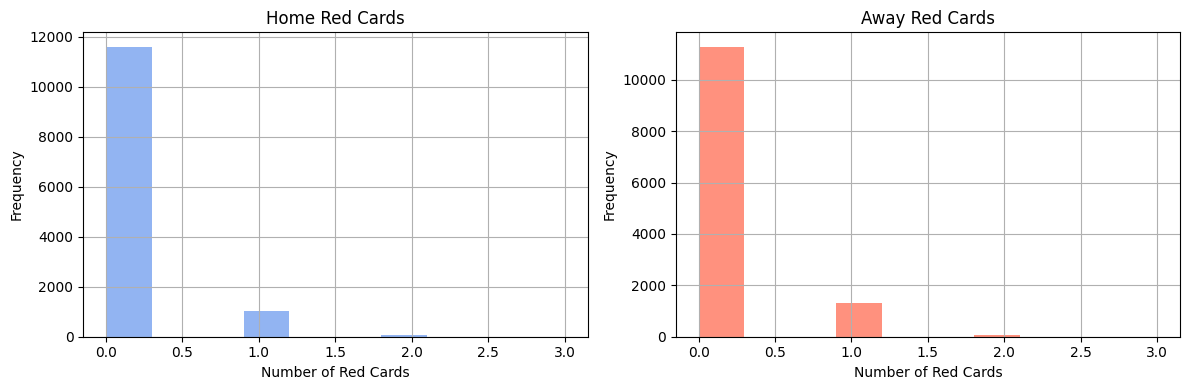

In [41]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# # Plot home_redCards on the first subplot
# df['home_redCards'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
# axes[0].set_title("Home Red Cards")
# axes[0].set_xlabel("Number of Red Cards")
# axes[0].set_ylabel("Frequency")

# # Plot away_redCards on the second subplot
# df['away_redCards'].hist(ax=axes[1], color='tomato', alpha=0.7)
# axes[1].set_title("Away Red Cards")
# axes[1].set_xlabel("Number of Red Cards")
# axes[1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot home_redCards on the first subplot
df['home_redCards'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
axes[0].set_title("Home Red Cards")
axes[0].set_xlabel("Number of Red Cards")
axes[0].set_ylabel("Frequency")

# Plot away_redCards on the second subplot
df['away_redCards'].hist(ax=axes[1], color='tomato', alpha=0.7)
axes[1].set_title("Away Red Cards")
axes[1].set_xlabel("Number of Red Cards")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

# Save the figure to PNG before showing
plt.savefig("../plots/red_cards_histograms.png", dpi=300, bbox_inches='tight')

plt.show()

In [43]:
def bin_red_cards_binary(x):
    # Returns 'No' if 0, otherwise 'Yes'
    return "No" if x == 0 else "Yes"

# For home red cards
df['home_redCards_binary'] = df['home_redCards'].apply(bin_red_cards_binary)

# For away red cards
df['away_redCards_binary'] = df['away_redCards'].apply(bin_red_cards_binary)

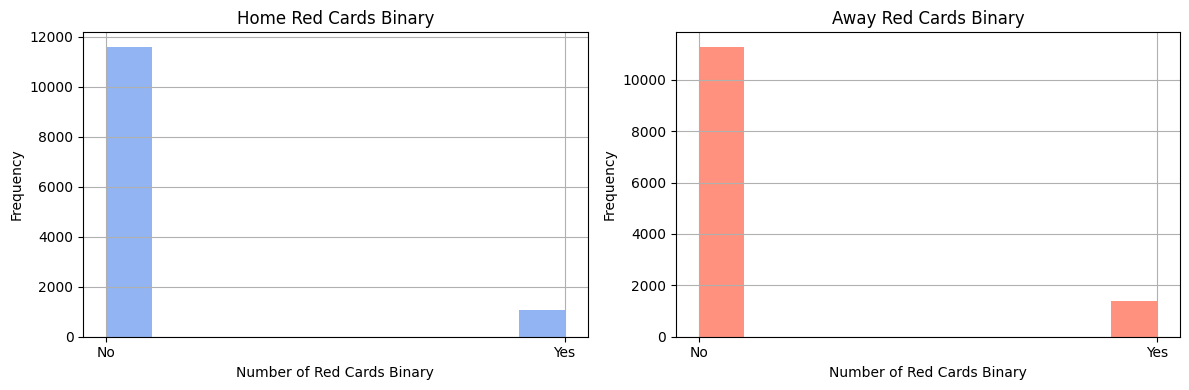

In [44]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# # Plot home_redCards on the first subplot
# df['home_redCards_binary'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
# axes[0].set_title("Home Red Cards Binary")
# axes[0].set_xlabel("Number of Red Cards Binary")
# axes[0].set_ylabel("Frequency")

# # Plot away_redCards on the second subplot
# df['away_redCards_binary'].hist(ax=axes[1], color='tomato', alpha=0.7)
# axes[1].set_title("Away Red Cards Binary")
# axes[1].set_xlabel("Number of Red Cards Binary")
# axes[1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot home_redCards_binary on the first subplot
df['home_redCards_binary'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
axes[0].set_title("Home Red Cards Binary")
axes[0].set_xlabel("Number of Red Cards Binary")
axes[0].set_ylabel("Frequency")

# Plot away_redCards_binary on the second subplot
df['away_redCards_binary'].hist(ax=axes[1], color='tomato', alpha=0.7)
axes[1].set_title("Away Red Cards Binary")
axes[1].set_xlabel("Number of Red Cards Binary")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

# Save the figure to PNG before showing
plt.savefig("../plots/binary_red_cards_histograms.png", dpi=300, bbox_inches='tight')

plt.show()

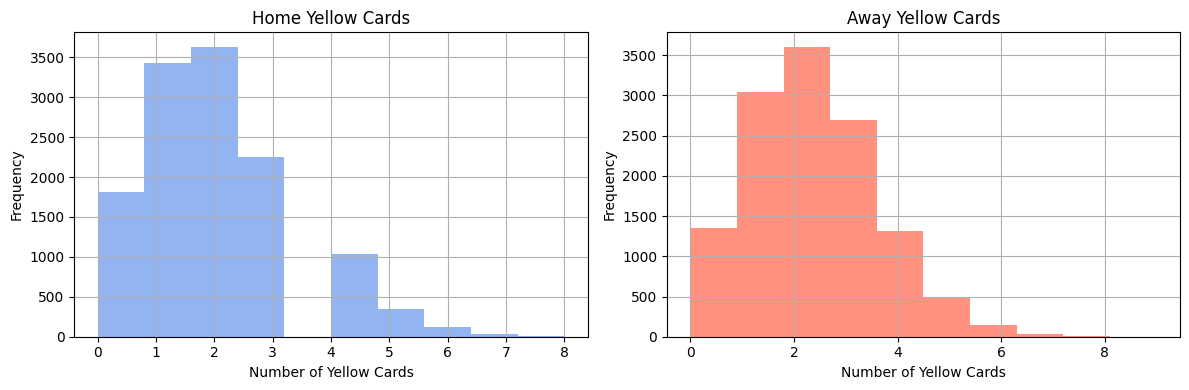

In [48]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# # Plot home_redCards on the first subplot
# df['home_yellowCards'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
# axes[0].set_title("Home Yellow Cards")
# axes[0].set_xlabel("Number of Yellow Cards")
# axes[0].set_ylabel("Frequency")

# # Plot away_redCards on the second subplot
# df['away_yellowCards'].hist(ax=axes[1], color='tomato', alpha=0.7)
# axes[1].set_title("Away Yellow Cards")
# axes[1].set_xlabel("Number of Yellow Cards")
# axes[1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot home_yellowCards
df['home_yellowCards'].hist(ax=axes[0], color='cornflowerblue', alpha=0.7)
axes[0].set_title("Home Yellow Cards")
axes[0].set_xlabel("Number of Yellow Cards")
axes[0].set_ylabel("Frequency")

# Plot away_yellowCards
df['away_yellowCards'].hist(ax=axes[1], color='tomato', alpha=0.7)
axes[1].set_title("Away Yellow Cards")
axes[1].set_xlabel("Number of Yellow Cards")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

# Save to PNG
plt.savefig("../plots/yellow_cards_histograms.png", dpi=300, bbox_inches='tight')
plt.show()

In [50]:
df[df['home_yellowCards'].isna() == True]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
4140    4888         2    2014 2015-03-02 19:45:00          95          98   

      home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
4140           1           1                   0                   0  ...   

      away_total_key_passes  away_total_xGoalsChain  away_total_xGoalsBuildup  \
4140                      9                1.909902                  0.964562   

      away_total_yellow_cards  away_total_red_cards  away_total_blocked_shots  \
4140                        5                     0                       4.0   

      away_total_saved_shots  gameresult  home_redCards_binary  \
4140                     0.0           1                   Yes   

      away_redCards_binary  
4140                    No  

[1 rows x 49 columns]

In [51]:
df[df['away_yellowCards'].isna() == True]

Empty DataFrame
Columns: [gameID, leagueID, season, date, homeTeamID, awayTeamID, home_Goals, away_Goals, home_GoalsHalfTime, away_GoalsHalfTime, home_xGoals, home_shots, home_shotsOnTarget, home_deep, home_ppda, home_fouls, home_corners, home_yellowCards, home_redCards, home_total_assists, home_total_xAssists, home_total_key_passes, home_total_xGoalsChain, home_total_xGoalsBuildup, home_total_yellow_cards, home_total_red_cards, home_total_blocked_shots, home_total_saved_shots, away_xGoals, away_shots, away_shotsOnTarget, away_deep, away_ppda, away_fouls, away_corners, away_yellowCards, away_redCards, away_total_assists, away_total_xAssists, away_total_key_passes, away_total_xGoalsChain, away_total_xGoalsBuildup, away_total_yellow_cards, away_total_red_cards, away_total_blocked_shots, away_total_saved_shots, gameresult, home_redCards_binary, away_redCards_binary]
Index: []

[0 rows x 49 columns]

In [52]:
print(df["home_yellowCards"].value_counts())
print(df["away_yellowCards"].value_counts())

2.0    3630
1.0    3433
3.0    2252
0.0    1813
4.0    1038
5.0     348
6.0     128
7.0      30
8.0       7
Name: home_yellowCards, dtype: int64
2.0    3605
1.0    3045
3.0    2691
0.0    1356
4.0    1319
5.0     480
6.0     141
7.0      35
8.0       6
9.0       2
Name: away_yellowCards, dtype: int64


In [53]:
# 1) Create a helper Series: median_yc_by_fouls
median_yc_by_fouls = (
    df.groupby("home_fouls")["home_yellowCards"]
      .transform("median")
)

median_yc_by_fouls_away = (
    df.groupby("away_fouls")["away_yellowCards"]
      .transform("median")
)

# 2) Where home_yellowCards is NaN, fill with the median from that row's fouls group
df["home_yellowCards"] = np.where(
    df["home_yellowCards"].isna(),
    median_yc_by_fouls,  # fill with median
    df["home_yellowCards"]  # otherwise keep original
)

df["away_yellowCards"] = np.where(
    df["away_yellowCards"].isna(),
    median_yc_by_fouls_away,
    df["away_yellowCards"]
)

# 3) Convert the cleaned column to an integer if needed
df["home_yellowCards"] = df["home_yellowCards"].astype(int)

df["away_yellowCards"] = df["away_yellowCards"].astype(int)

# 4) Now apply your binning function
def bin_yellow_cards(x):
    # "7+" if x >= 7 else string of the integer
    return "5+" if x >= 5 else str(x)


In [54]:
df["home_yellowCards_cat"] = df["home_yellowCards"].apply(bin_yellow_cards)
df["away_yellowCards_cat"] = df["away_yellowCards"].apply(bin_yellow_cards)

In [55]:
print(df["home_yellowCards_cat"].value_counts())
print(df["away_yellowCards_cat"].value_counts())

2     3631
1     3433
3     2252
0     1813
4     1038
5+     513
Name: home_yellowCards_cat, dtype: int64
2     3605
1     3045
3     2691
0     1356
4     1319
5+     664
Name: away_yellowCards_cat, dtype: int64


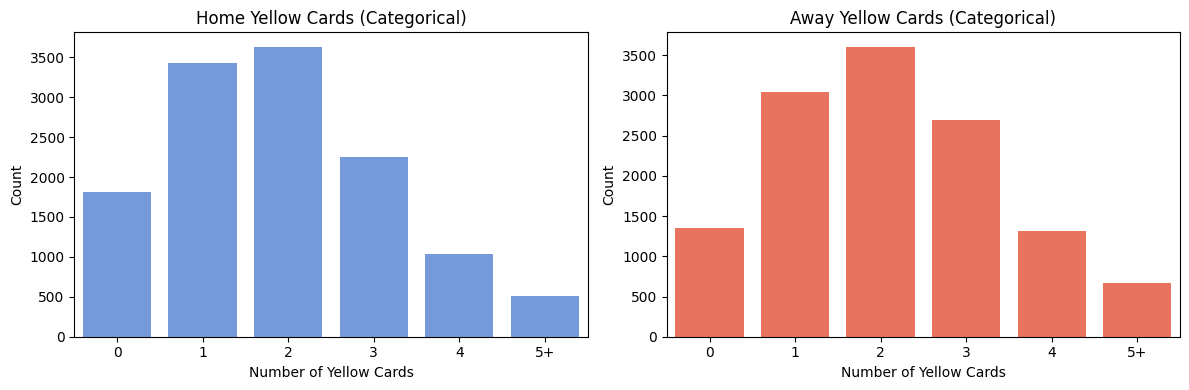

In [56]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# # Home yellow cards
# sns.countplot(
#     x="home_yellowCards_cat",
#     data=df,
#     ax=axes[0],
#     color="cornflowerblue",
#     order=["0", "1", "2", "3", "4", "5+"]
# )
# axes[0].set_title("Home Yellow Cards (Categorical)")
# axes[0].set_xlabel("Number of Yellow Cards")
# axes[0].set_ylabel("Count")

# # Away yellow cards
# sns.countplot(
#     x="away_yellowCards_cat",
#     data=df,
#     ax=axes[1],
#     color="tomato",
#     order=["0", "1", "2", "3", "4", "5+"]
# )
# axes[1].set_title("Away Yellow Cards (Categorical)")
# axes[1].set_xlabel("Number of Yellow Cards")
# axes[1].set_ylabel("Count")

# plt.tight_layout()
# plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Home yellow cards categorical
sns.countplot(
    x="home_yellowCards_cat",
    data=df,
    ax=axes[0],
    color="cornflowerblue",
    order=["0", "1", "2", "3", "4", "5+"]
)
axes[0].set_title("Home Yellow Cards (Categorical)")
axes[0].set_xlabel("Number of Yellow Cards")
axes[0].set_ylabel("Count")

# Away yellow cards categorical
sns.countplot(
    x="away_yellowCards_cat",
    data=df,
    ax=axes[1],
    color="tomato",
    order=["0", "1", "2", "3", "4", "5+"]
)
axes[1].set_title("Away Yellow Cards (Categorical)")
axes[1].set_xlabel("Number of Yellow Cards")
axes[1].set_ylabel("Count")

plt.tight_layout()

# Save to PNG
plt.savefig("../plots/yellow_cards_categorical.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
from scipy.stats import chi2_contingency

# Suppose your DataFrame is named df and contains the columns:
#   - 'gameresult' (categorical codes like 0, 1, 2)
#   - 'time_category' (e.g., 'Noon', 'After Noon', 'Night')
#   - 'leagueID' (categorical league identifiers)

# List of categorical pairs to test
cat_pairs = [
    ("gameresult", "leagueID"),
    ("gameresult", "home_yellowCards_cat"),
    ("gameresult", "away_yellowCards_cat"),
    ("gameresult", "home_redCards_binary"),
    ("gameresult", "away_redCards_binary"),
]

for col1, col2 in cat_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Run the chi-square test of independence
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"=== Chi-square test: {col1} vs. {col2} ===")
    print("Contingency Table:")
    print(contingency_table)
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, 
                       index=contingency_table.index, 
                       columns=contingency_table.columns))
    print(f"\nChi2 Statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("-"*50, "\n")

=== Chi-square test: gameresult vs. leagueID ===
Contingency Table:
leagueID       1     2    3     4     5
gameresult                             
0            845   837  651   764   757
1            629   668  532   682   661
2           1186  1155  959  1214  1140

Expected Frequencies:
leagueID              1            2           3            4            5
gameresult                                                                
0            808.488959   808.488959  651.046372   808.488959   777.486751
1            665.419558   665.419558  535.837855   665.419558   639.903470
2           1186.091483  1186.091483  955.115773  1186.091483  1140.609779

Chi2 Statistic: 10.2695
p-value: 0.2466
Degrees of Freedom: 8
-------------------------------------------------- 

=== Chi-square test: gameresult vs. home_yellowCards_cat ===
Contingency Table:
home_yellowCards_cat     0     1     2    3    4   5+
gameresult                                           
0                      438   9

## 1. gameresult vs. leagueID
p-value = 0.2466 (above 0.05)
There is no statistically significant association between the match outcome (gameresult) and leagueID.
In other words, the distribution of home wins/draws/away wins doesn’t differ enough across leagues to be considered non-random at the 5% significance level.

## 2. gameresult vs. home_yellowCards_cat
p-value = 0.0000 (well below 0.05)
Statistically significant association exists between game result and the binned home yellow-card categories (0, 1, 2, 3, 4, 5+).
This implies that the distribution of home yellow cards (how many the home team gets) is not independent of whether the home team ended up winning, drawing, or losing.

## 3. gameresult vs. away_yellowCards_cat
p-value = 0.0000
Similarly, a significant association between game result and the binned away yellow-card categories.
The number of yellow cards the away team receives is not independent of the match outcome.

## 4. gameresult vs. home_redCards_binary
p-value = 0.0000
There’s a significant association between game result and whether the home team had no red cards (No) or at least one red card (Yes).
In simpler terms, whether the home team sees red cards correlates with whether the home team won, drew, or lost.

## 5. gameresult vs. away_redCards_binary
p-value = 0.0000
Another significant association: the away team’s red-card status (No vs. Yes) is tied to the final outcome.

## Overall Takeaways
LeagueID does not appear to affect the distribution of match outcomes (H/D/A).
Cards (both yellow and red, for home and away) do show a statistically significant association with match outcomes. This does not tell you which categories lead to more wins or losses, only that they are not independent. For directionality or deeper insight, you could:
Look at residuals (which categories are over- or under-represented).
Conduct post-hoc tests (e.g., pairwise comparisons).
Examine the contingency tables in more detail (e.g., more red cards in losing teams?).
Because p-values for all card-related tests are effectively zero, you can conclude that the distribution of match outcomes is strongly associated with the number of cards (yellow or red) teams receive.

In [58]:
df

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
0               1           0                   1                   0  ...   
1               0           1                   0                   0  ...   
2               2           2                   0                   1  ...   
3               4           2                   3                   0  ...   
4               1           3                   0                   1  ...   
...           ...         ...                 ...                 ...  ...   
12675           1           2                   1                   1  ...   
12676           1           2                   1                   1  ...   
12677           2           0                   1                   0  ...   
12678           0           1                   0                   1  ...   
12679           1           1                   1                   0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                      0.811549                        3   
1                      0.736815                        4   
2                      1.030588                        2   
3                      5.617276                        4   
4                      8.554974                        0   
...                         ...                      ...   
12675                  0.715843                        2   
12676                  1.758012                        1   
12677                  0.544502                        0   
12678                  0.764512                        0   
12679                  0.421488                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                         0                       3.0                     4.0   
1                         0                       2.0                     2.0   
2                         0                       3.0                     3.0   
3                         0                       2.0                     3.0   
4                         0                       2.0                     4.0   
...                     ...                       ...                     ...   
12675                     0                       1.0                     3.0   
12676                     0                       4.0                     3.0   
12677                     0                       0.0                     2.0   
12678                     0                       1.0                     1.0   
12679                     0                       2.0                     0.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               2                    No                    No   
1               0                    No                    No   
2               1                    No                    No   
3               2                    No                    No   
4               0                    No                    No   
...           ...                   .

In [59]:
display(df[df['home_total_blocked_shots'].isna() == True])
display(df[df['home_total_saved_shots'].isna() == True])
display(df[df['away_total_blocked_shots'].isna() == True])
display(df[df['away_total_saved_shots'].isna() == True])

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
7592     9486         1    2018 2019-03-02 15:00:00          73          88   
11751   15207         3    2020 2020-11-21 14:30:00         262         119   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
5270            2           1                   0                   0  ...   
7592            0           1                   0                   0  ...   
11751           1           2                   0                   1  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
5270                   0.348398                        1   
7592                   2.990505                        2   
11751                  2.241605                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
5270                      0                       NaN                     NaN   
7592                      0                       6.0                     6.0   
11751                     0                       2.0                     2.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
5270            2                   Yes                    No   
7592            0                    No                    No   
11751           0                    No                    No   

       home_yellowCards_cat  away_yellowCards_cat  
5270                      2                     1  
7592                      1                     2  
11751                     0                     1  

[3 rows x 51 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
7592     9486         1    2018 2019-03-02 15:00:00          73          88   
11751   15207         3    2020 2020-11-21 14:30:00         262         119   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
5270            2           1                   0                   0  ...   
7592            0           1                   0                   0  ...   
11751           1           2                   0                   1  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
5270                   0.348398                        1   
7592                   2.990505                        2   
11751                  2.241605                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
5270                      0                       NaN                     NaN   
7592                      0                       6.0                     6.0   
11751                     0                       2.0                     2.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
5270            2                   Yes                    No   
7592            0                    No                    No   
11751           0                    No                    No   

       home_yellowCards_cat  away_yellowCards_cat  
5270                      2                     1  
7592                      1                     2  
11751                     0                     1  

[3 rows x 51 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
1447     1528         4    2015 2015-11-29 23:30:00         138         146   
2267     2348         5    2016 2016-10-23 22:45:00         161         164   
4644     5392         3    2014 2014-10-18 14:30:00         117         123   
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
5771     7413         1    2017 2018-03-10 15:00:00         219          84   
6179     7821         2    2017 2018-04-17 18:45:00         106         116   
11644   15100         4    2020 2021-04-18 14:15:00         143         156   
12642   16098         5    2020 2021-05-01 19:00:00         160         170   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
1447            1           0                   0                   0  ...   
2267            0           0                   0                   0  ...   
4644            6           0                   4                   0  ...   
5270            2           1                   0                   0  ...   
5771            0           0                   0                   0  ...   
6179            4           0                   1                   0  ...   
11644           5           0                   2                   0  ...   
12642           2           0                   1                   0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
1447                   0.000000                        2   
2267                   0.000000                        2   
4644                   0.000000                        1   
5270                   0.348398                        1   
5771                   0.000000                        3   
6179                   0.000000                        1   
11644                  0.000000                        1   
12642                  0.000000                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
1447                      2                       NaN                     NaN   
2267                      0                       NaN                     NaN   
4644                      0                       NaN                     NaN   
5270                      0                       NaN                     NaN   
5771                      1                       NaN                     NaN   
6179                      0                       NaN                     NaN   
11644                     0                       NaN                     NaN   
12642                     1                       NaN                     NaN   

       gameresult  home_redCards_binary  away_redCards_binary  \
1447            2                    No                   Yes   
2267            1                    No                    No   
4644            2                    No                    No   
5270            2                   Yes                    No   
5771            1                    No                   Yes   
6179            2                    No                    No   
11644           2                    No                    No   
12642           2                    No                   Yes   

       home_yellowCards_cat  away_yellowCards_cat  
1447                      3                     2  
2267                      0                     2  
4644                      0                     1  
5270                      2                     1  
5771                      2                     3  
6179                      1                     1  
11644                     0                     1  
12642                     2                     3  

[8 rows x 51 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
1447     1528         4    2015 2015-11-29 23:30:00         138         146   
2267     2348         5    2016 2016-10-23 22:45:00         161         164   
4644     5392         3    2014 2014-10-18 14:30:00         117         123   
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
5771     7413         1    2017 2018-03-10 15:00:00         219          84   
6179     7821         2    2017 2018-04-17 18:45:00         106         116   
11644   15100         4    2020 2021-04-18 14:15:00         143         156   
12642   16098         5    2020 2021-05-01 19:00:00         160         170   

       home_Goals  away_Goals  home_GoalsHalfTime  away_GoalsHalfTime  ...  \
1447            1           0                   0                   0  ...   
2267            0           0                   0                   0  ...   
4644            6           0                   4                   0  ...   
5270            2           1                   0                   0  ...   
5771            0           0                   0                   0  ...   
6179            4           0                   1                   0  ...   
11644           5           0                   2                   0  ...   
12642           2           0                   1                   0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
1447                   0.000000                        2   
2267                   0.000000                        2   
4644                   0.000000                        1   
5270                   0.348398                        1   
5771                   0.000000                        3   
6179                   0.000000                        1   
11644                  0.000000                        1   
12642                  0.000000                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
1447                      2                       NaN                     NaN   
2267                      0                       NaN                     NaN   
4644                      0                       NaN                     NaN   
5270                      0                       NaN                     NaN   
5771                      1                       NaN                     NaN   
6179                      0                       NaN                     NaN   
11644                     0                       NaN                     NaN   
12642                     1                       NaN                     NaN   

       gameresult  home_redCards_binary  away_redCards_binary  \
1447            2                    No                   Yes   
2267            1                    No                    No   
4644            2                    No                    No   
5270            2                   Yes                    No   
5771            1                    No                   Yes   
6179            2                    No                    No   
11644           2                    No                    No   
12642           2                    No                   Yes   

       home_yellowCards_cat  away_yellowCards_cat  
1447                      3                     2  
2267                      0                     2  
4644                      0                     1  
5270                      2                     1  
5771                      2                     3  
6179                      1                     1  
11644                     0                     1  
12642                     2                     3  

[8 rows x 51 columns]

In [80]:
#update numeric data
# 1) Select all numeric columns
df_num_updated = df.select_dtypes(include=[np.number])

# 2) Exclude certain columns
excluded_cols = ['gameID', 'leagueID', 'season', 'homeTeamID', 'awayTeamID','gameresult','home_redCards_binary','away_redCards_binary','home_yellowCards_cat','away_yellowCards_cat']
df_num_updated = df_num_updated.drop(columns=excluded_cols, errors='ignore')

df_num_updated.shape

(12680, 40)

In [81]:
# saving df after finishing EDA
with open("../pickles/df_after_EDA.pkl", "wb") as f:
    pickle.dump(df, f)  # Save the DataFrame with standard pickle

with open("../pickles/df_num_after_EDA.pkl", "wb") as f:
    pickle.dump(df_num_updated, f)  # Save the DataFrame with standard pickle